# Présentation Projet F1

## L'objectif de cette analyse 
###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dfResult = pd.read_csv("results.csv")
dfDriv = pd.read_csv("drivers.csv")

## Annalyse des données importé

In [2]:
pd.set_option('display.max_rows', 11)
pd.set_option('display.max_columns', None)
dfResult

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,6
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


### Ajout données manquantes

In [4]:
dfDriv = pd.read_csv("drivers.csv")
dfRace = pd.read_csv("races.csv")
dfConst = pd.read_csv("constructors.csv")
dfStatus = pd.read_csv("status.csv")

df = pd.merge(dfResult, dfDriv, on='driverId')
df = pd.merge(df, dfRace, on='raceId')
df = pd.merge(df, dfConst, on='constructorId')
df = pd.merge(df, dfStatus, on='statusId')

In [5]:
df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,25,19,5,1,23,8,3,3,3,6.0,56,+38.450,5517005,19,7,1:35.922,208.031,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,49,20,5,1,23,5,5,5,5,4.0,57,+26.789,5493759,49,1,1:33.193,209.062,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,3,3,Bahrain Grand Prix,2008-04-06,11:30:00,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,17224,710,346,181,36,18,13,13,13,0.0,55,\N,\N,\N,\N,\N,\N,113,siffert,\N,\N,Jo,Siffert,1936-07-07,Swiss,http://en.wikipedia.org/wiki/Jo_Siffert,1964,2,39,Dutch Grand Prix,1964-05-24,\N,http://en.wikipedia.org/wiki/1964_Dutch_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,brabham-brm,Brabham-BRM,British,http://en.wikipedia.org/wiki/Brabham,+25 Laps
25836,17103,704,346,181,28,10,13,13,13,0.0,55,\N,\N,\N,\N,\N,\N,113,siffert,\N,\N,Jo,Siffert,1936-07-07,Swiss,http://en.wikipedia.org/wiki/Jo_Siffert,1965,6,39,Dutch Grand Prix,1965-07-18,\N,http://en.wikipedia.org/wiki/1965_Dutch_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,brabham-brm,Brabham-BRM,British,http://en.wikipedia.org/wiki/Brabham,+25 Laps
25837,17820,736,347,95,11,9,13,13,13,0.0,79,\N,\N,\N,\N,\N,\N,120,bonnier,\N,\N,Jo,Bonnier,1930-01-31,Swedish,http://en.wikipedia.org/wiki/Joakim_Bonnier,1962,8,46,United States Grand Prix,1962-10-07,\N,http://en.wikipedia.org/wiki/1962_United_State...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,porsche,Porsche,German,http://en.wikipedia.org/wiki/Porsche_in_Formul...,+21 Laps
25838,19315,803,547,87,28,20,15,15,15,0.0,44,\N,\N,\N,\N,\N,\N,125,gould,\N,\N,Horace,Gould,1918-09-20,British,http://en.wikipedia.org/wiki/Horace_Gould,1954,5,9,British Grand Prix,1954-07-17,\N,http://en.wikipedia.org/wiki/1954_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,cooper,Cooper,British,http://en.wikipedia.org/wiki/Cooper_Car_Company,+46 Laps


### Test des données

In [6]:
for index, row in df.iterrows(): 
    if row['statusId']==1: 
        print(row['status']) 
        break

Finished


In [7]:
for index, row in df.iterrows(): 
    if row['driverId']==1: 
        print(row['forename']) 
        break

Lewis


### Filtre sur Hamilton

In [8]:
dfHamilton = df[df['driverId'] == 1]
dfHamilton

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
5,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
6,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
7,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17047,23957,997,1,131,44,2,\N,R,16,0.0,62,\N,\N,58,3,1:07.241,231.180,32,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2018,9,70,Austrian Grand Prix,2018-07-01,13:10:00,http://en.wikipedia.org/wiki/2018_Austrian_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Fuel pressure
17064,21660,877,1,1,4,1,\N,R,21,0.0,19,\N,\N,19,16,1:47.266,186.400,10,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2012,18,24,Abu Dhabi Grand Prix,2012-11-04,13:00:00,http://en.wikipedia.org/wiki/2012_Abu_Dhabi_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Electrical
18391,22391,911,1,131,44,2,\N,R,19,0.0,38,\N,\N,33,10,1:53.707,221.748,31,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2014,12,13,Belgian Grand Prix,2014-08-24,12:00:00,http://en.wikipedia.org/wiki/2014_Belgian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Retired
20556,25685,1087,1,131,44,4,\N,R,20,0.0,0,\N,\N,\N,0,\N,\N,130,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2022,14,13,Belgian Grand Prix,2022-08-28,13:00:00,http://en.wikipedia.org/wiki/2022_Belgian_Gran...,2022-08-26,12:00:00,2022-08-26,15:00:00,2022-08-27,11:00:00,2022-08-27,14:00:00,\N,\N,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz

### Transformation des données

In [9]:
dfHamilton['position'] = pd.to_numeric(dfHamilton['position'],errors='coerce')

C:\Users\Adam\AppData\Local\Temp\ipykernel_12876\637197815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHamilton['position'] = pd.to_numeric(dfHamilton['position'],errors='coerce')


In [10]:
dfHamilton.date=pd.to_datetime(dfHamilton.date, format="%Y-%m-%d")

C:\Users\Adam\AppData\Local\Temp\ipykernel_12876\2813394181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHamilton.date=pd.to_datetime(dfHamilton.date, format="%Y-%m-%d")


In [11]:
dfHamilton['grid'] = pd.to_numeric(dfHamilton['grid'],errors='coerce')

C:\Users\Adam\AppData\Local\Temp\ipykernel_12876\3369042888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHamilton['grid'] = pd.to_numeric(dfHamilton['grid'],errors='coerce')


In [12]:
dfHam1er = dfHamilton[dfHamilton['position'] == 1]

In [14]:
len(dfHamilton['raceId'].unique())

310

### Ensemble des positions d'Hamilton à chaucune de ses courses

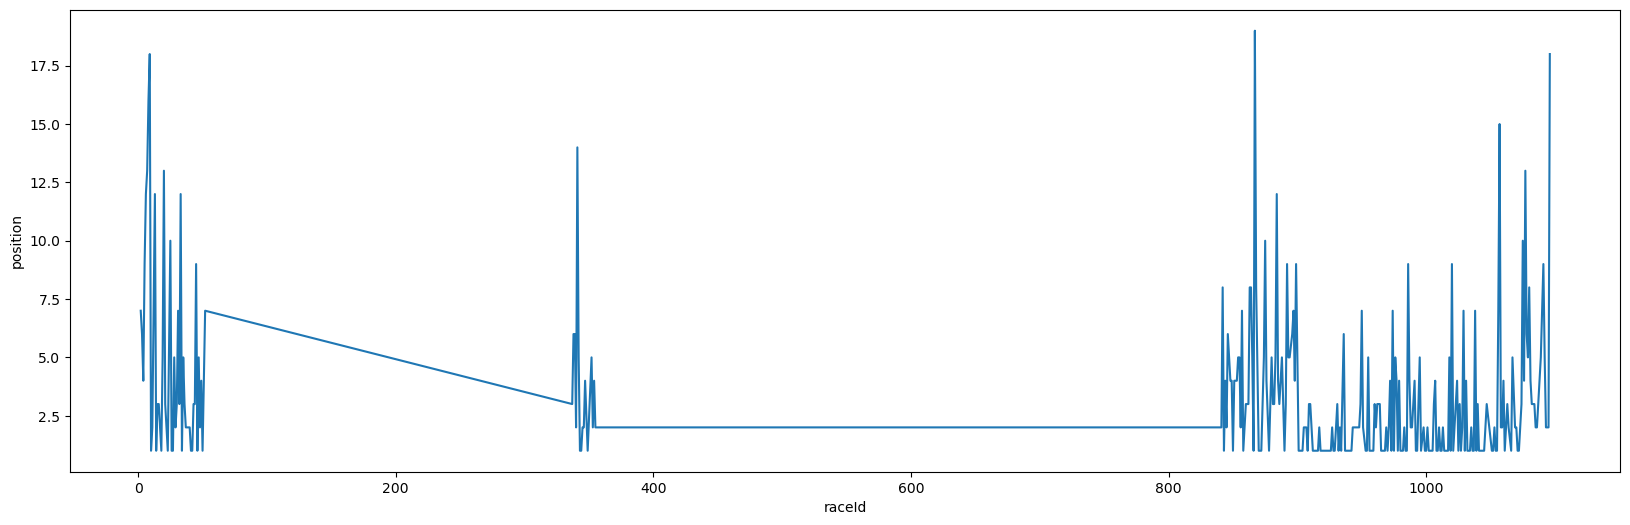

In [15]:
plt.subplots(figsize=(20,6))
sns.lineplot(x="raceId", y="position", data=dfHamilton)
plt.show()

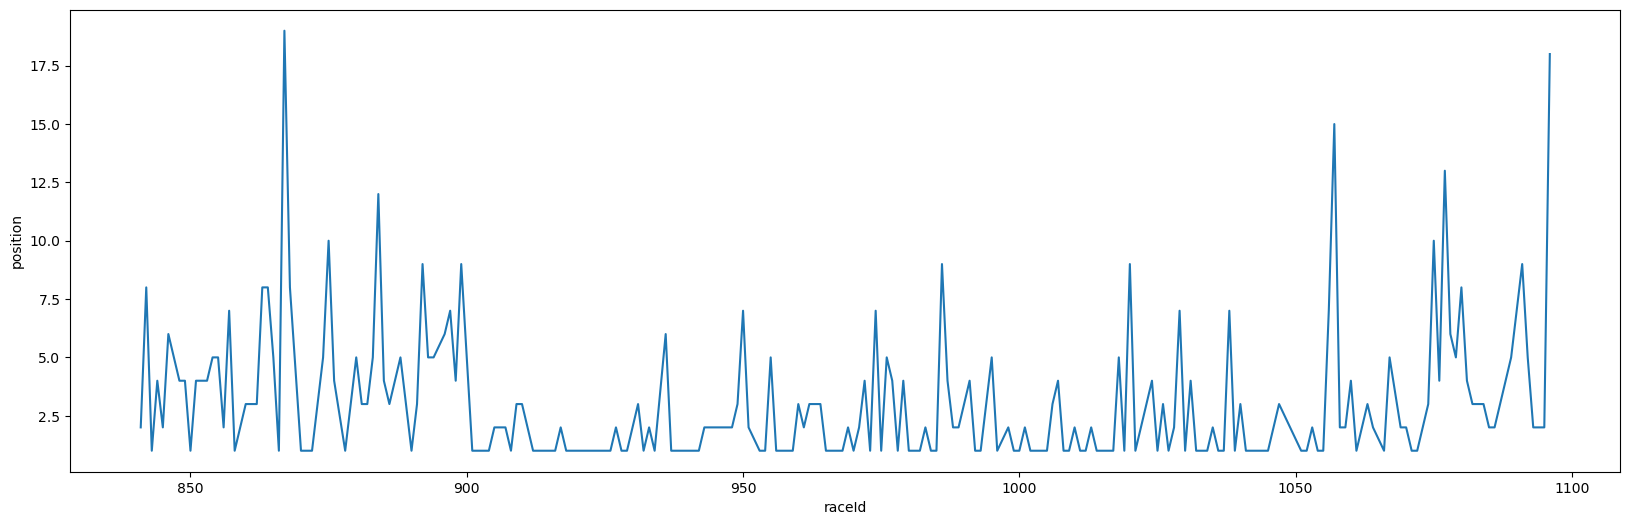

In [16]:
df2=dfHamilton[dfHamilton['raceId'] > 800]
plt.subplots(figsize=(20,6))
sns.lineplot(x="raceId", y="position", data=df2)
plt.show()

### Test des données

In [17]:
for i in dfHamilton['name_x'].unique():
    print (i)
    x=0
    for index, row in dfHamilton.iterrows(): 
        if i==row['name_x']:
            x+=1
            print(row['raceId'])
    print("il y a ",x," course")

Australian Grand Prix
18
36
338
841
860
880
926
948
969
989
1010
1076
900
1
il y a  14  course
Malaysian Grand Prix
19
37
2
339
842
861
881
901
927
983
963
il y a  11  course
Spanish Grand Prix
21
39
845
864
904
930
973
993
1014
1036
1055
1079
5
884
952
341
il y a  16  course
Turkish Grand Prix
22
47
7
343
844
1044
1067
il y a  7  course
Monaco Grand Prix
23
40
342
846
865
885
905
931
953
974
994
1015
1056
1080
6
il y a  15  course
French Grand Prix
25
43
996
1017
1059
1085
il y a  6  course
British Grand Prix
26
44
346
849
868
887
908
934
957
978
998
1019
1034
1061
1083
8
il y a  16  course
German Grand Prix
27
347
850
888
909
959
999
1020
9
869
il y a  10  course
Hungarian Grand Prix
28
46
10
851
870
890
910
936
958
979
1000
1021
1033
1062
1086
348
il y a  16  course
European Grand Prix
29
11
345
848
955
45
867
il y a  7  course
Belgian Grand Prix
30
49
349
891
937
960
980
1001
1022
1037
1063
12
852
871
911
1087
il y a  16  course
Italian Grand Prix
31
48
853
872
892
912
938
961
981


In [18]:
len(dfHamilton['name_x'].unique())

38

### Chaque graphique donne les positions d'Hamilton en fonction de la date par Grand Prix

C:\Users\Adam\AppData\Local\Temp\ipykernel_12876\2529437618.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(20,6))


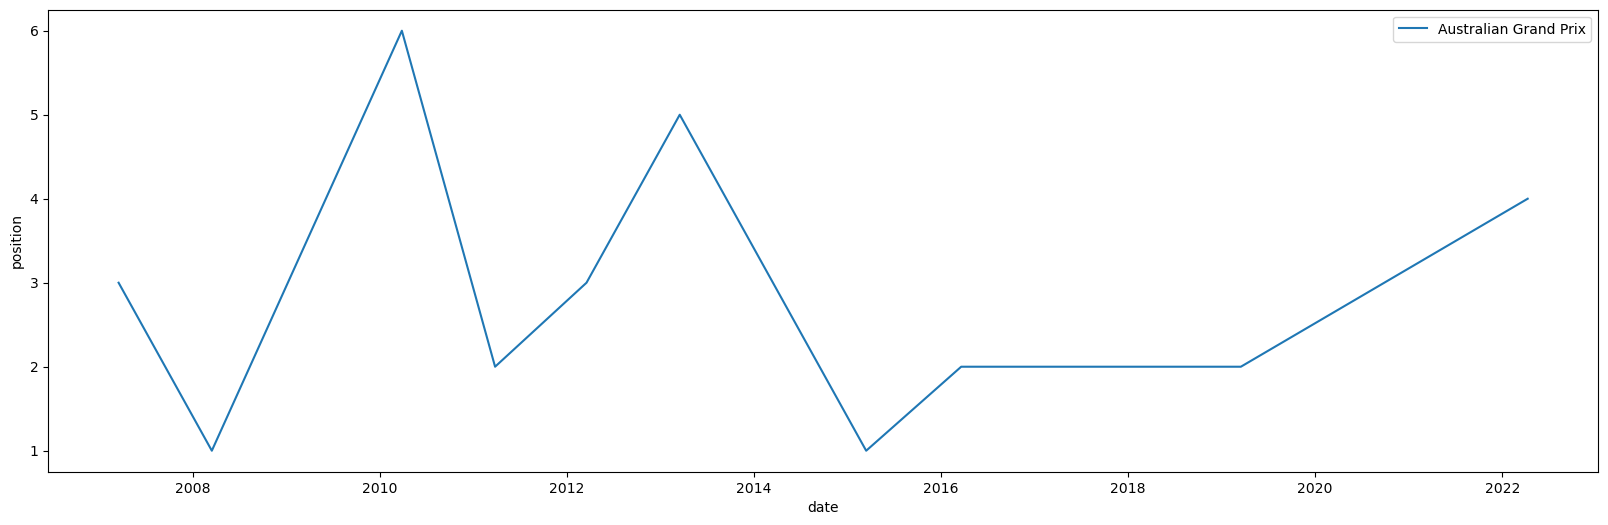

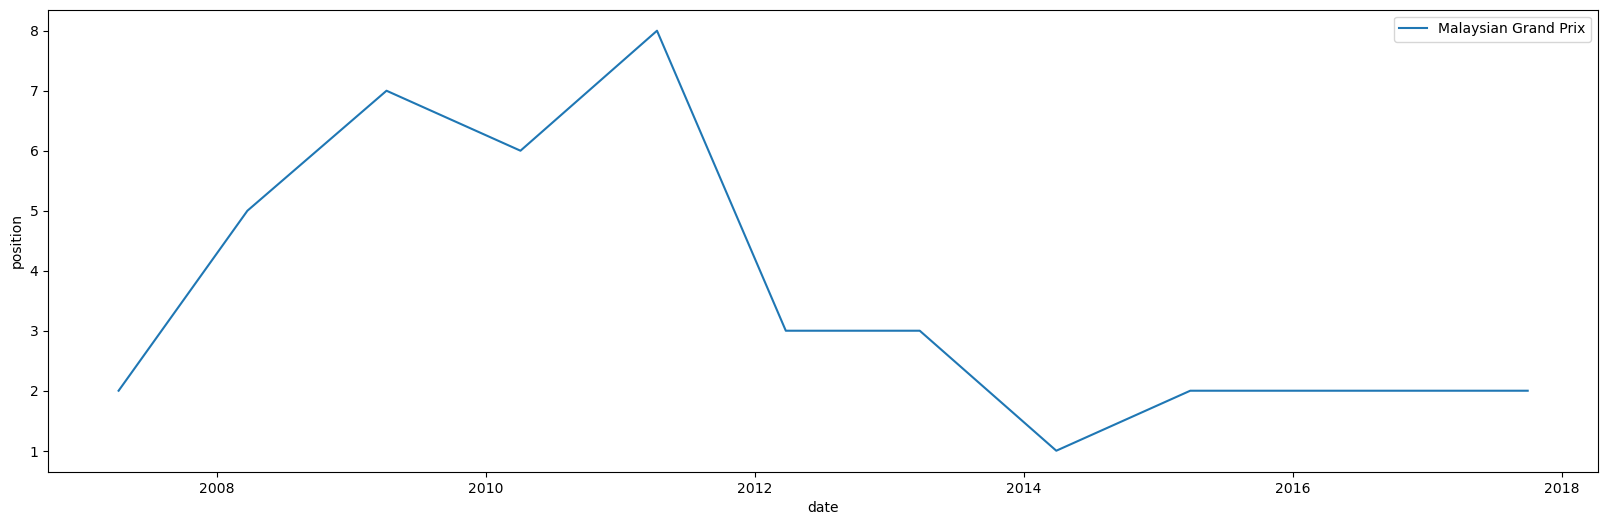

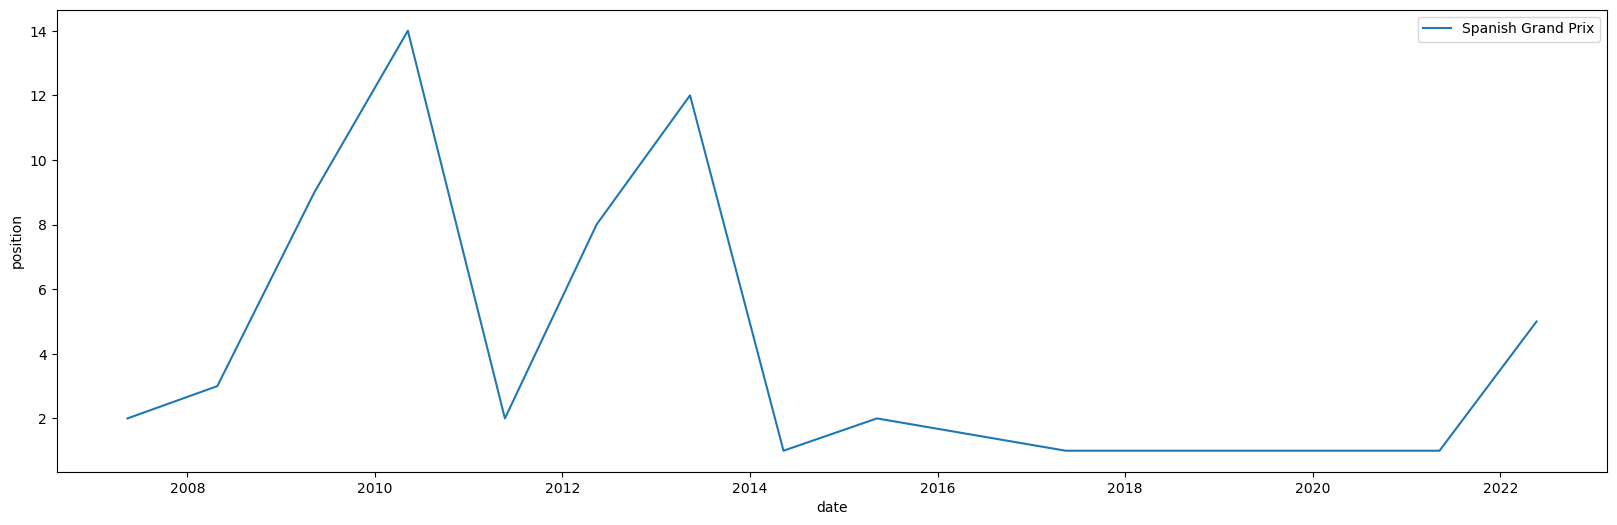

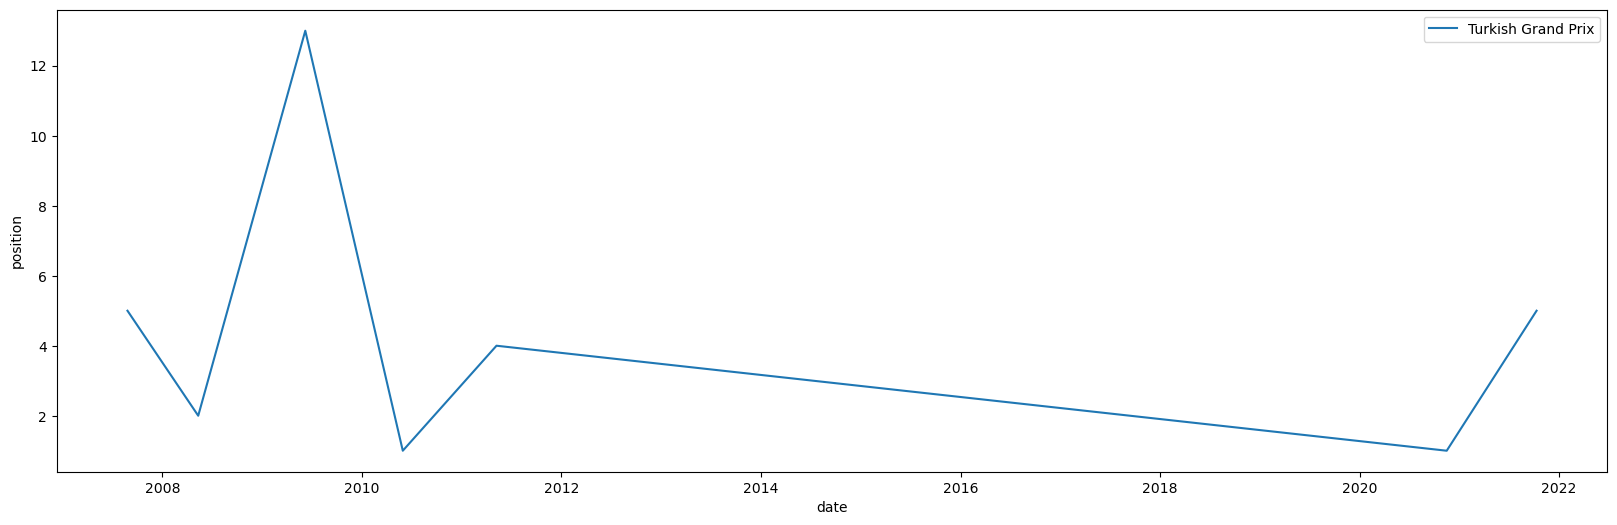

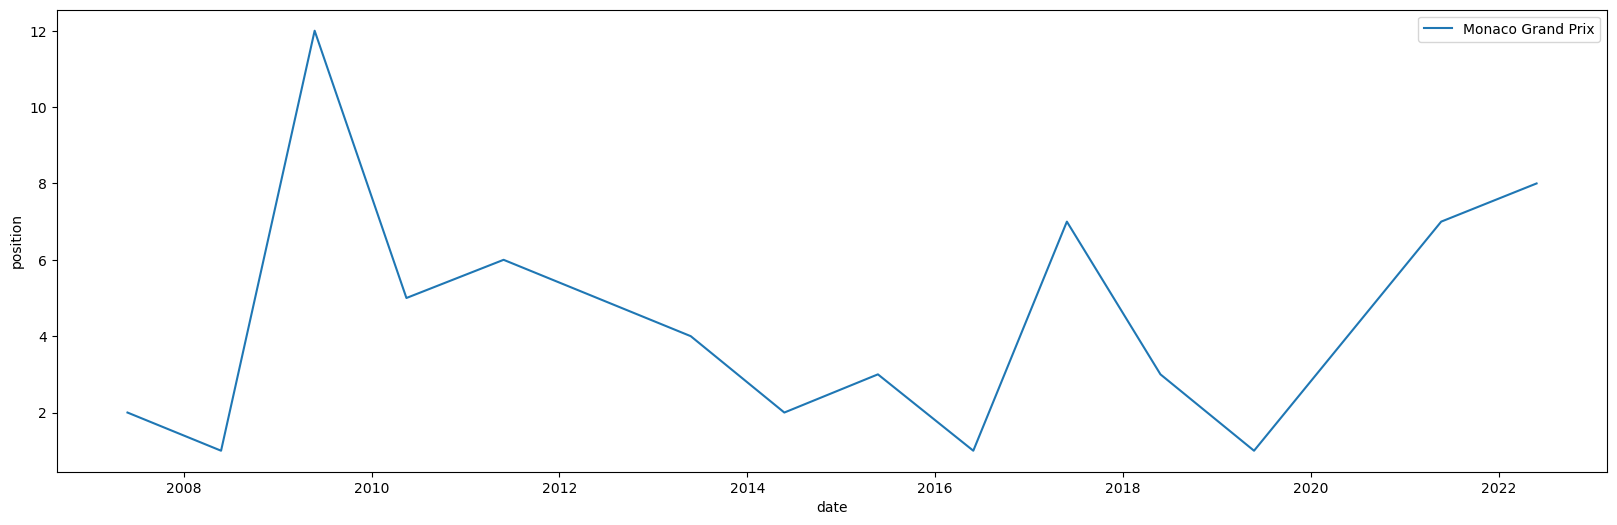

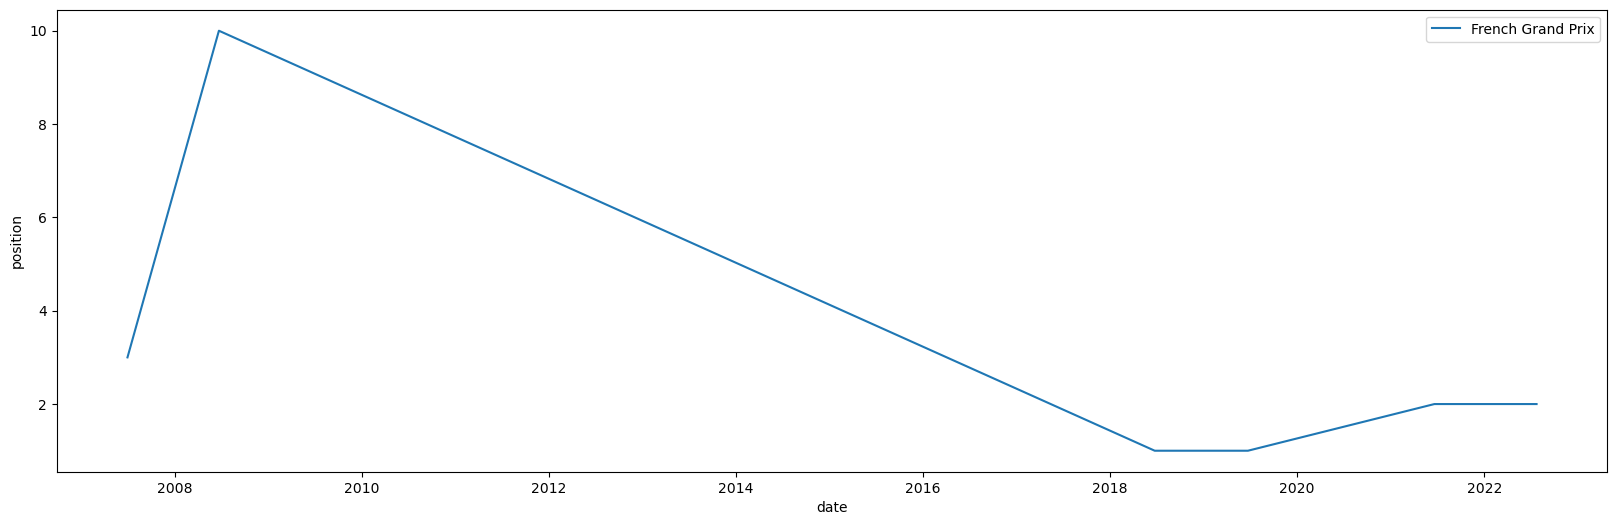

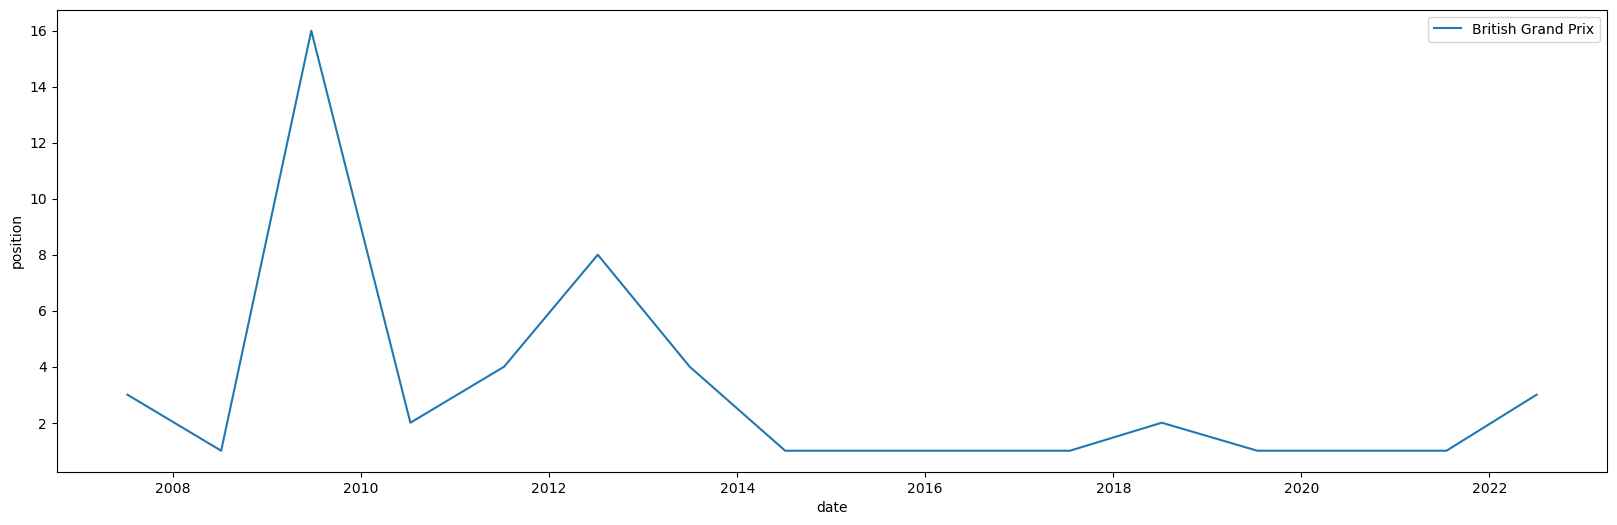

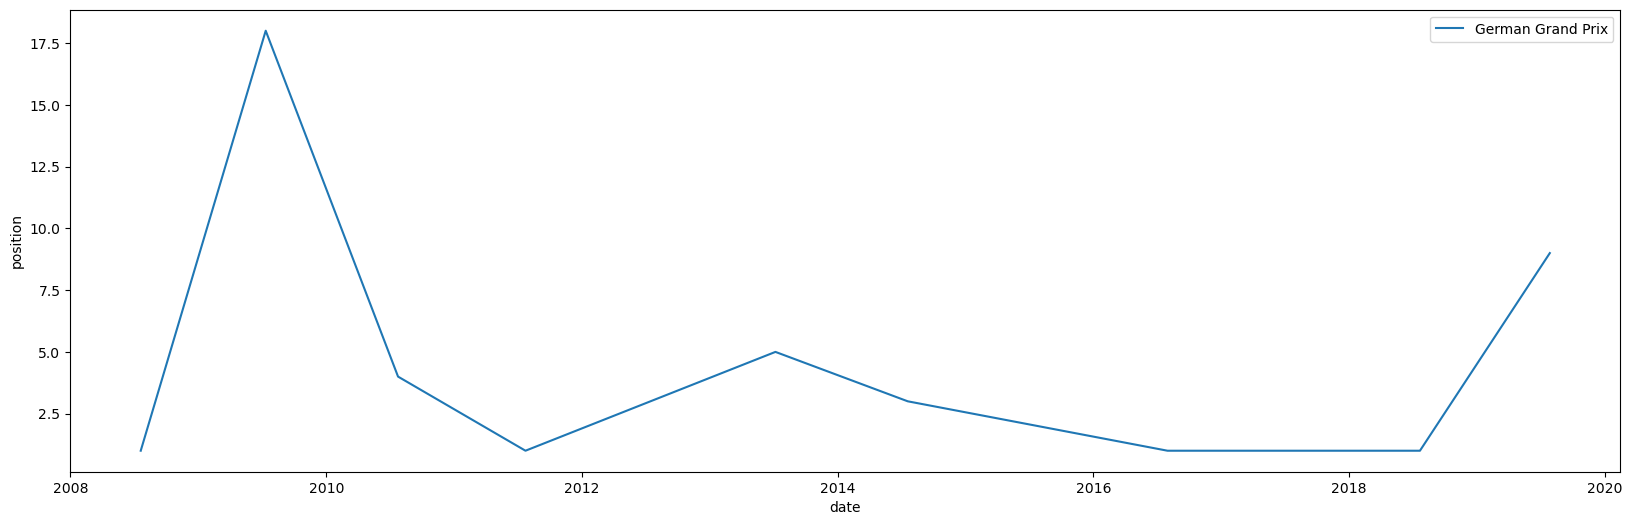

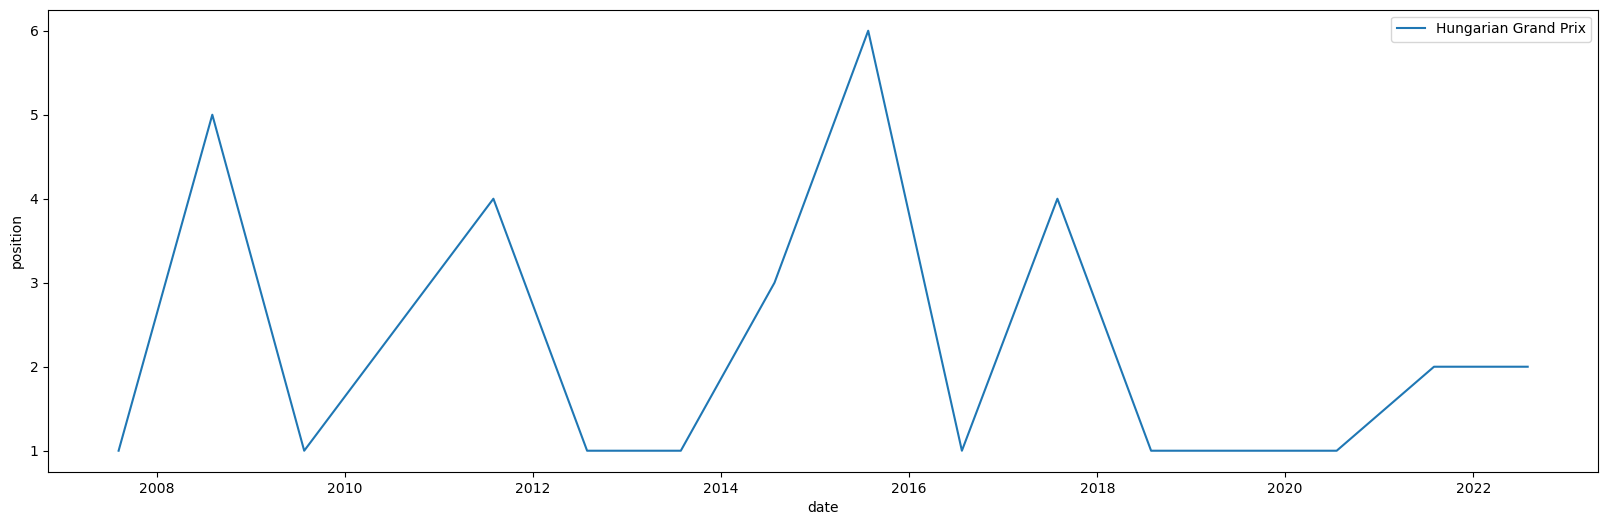

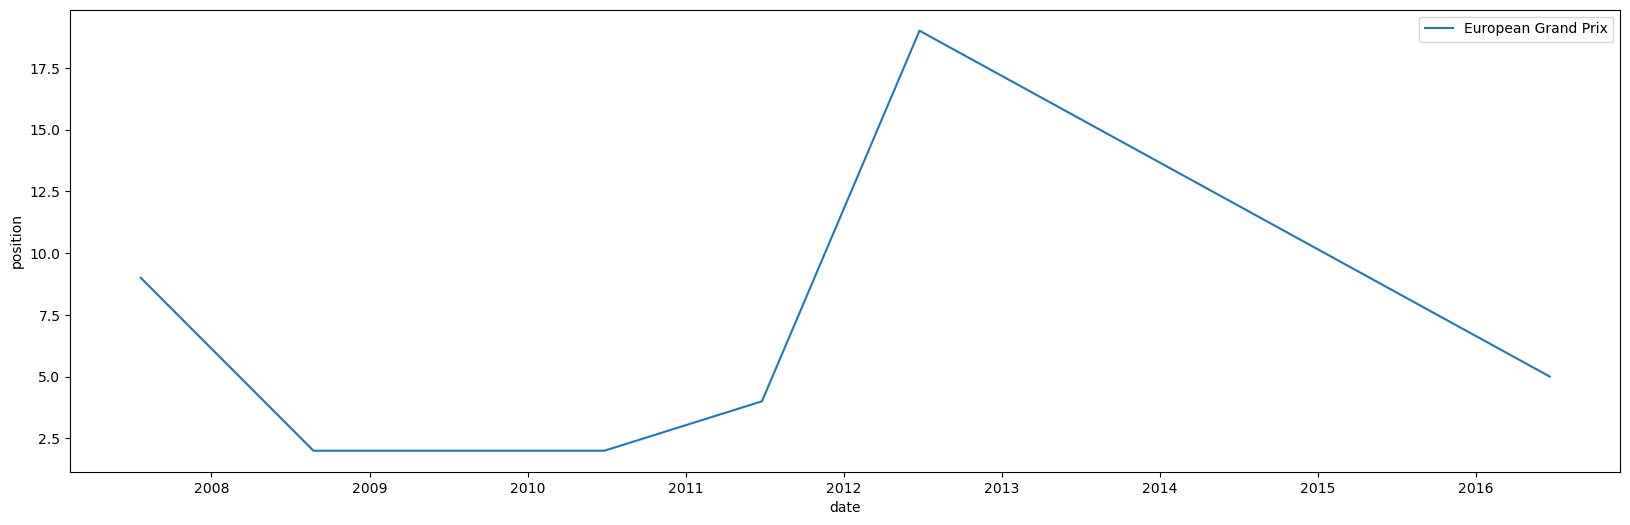

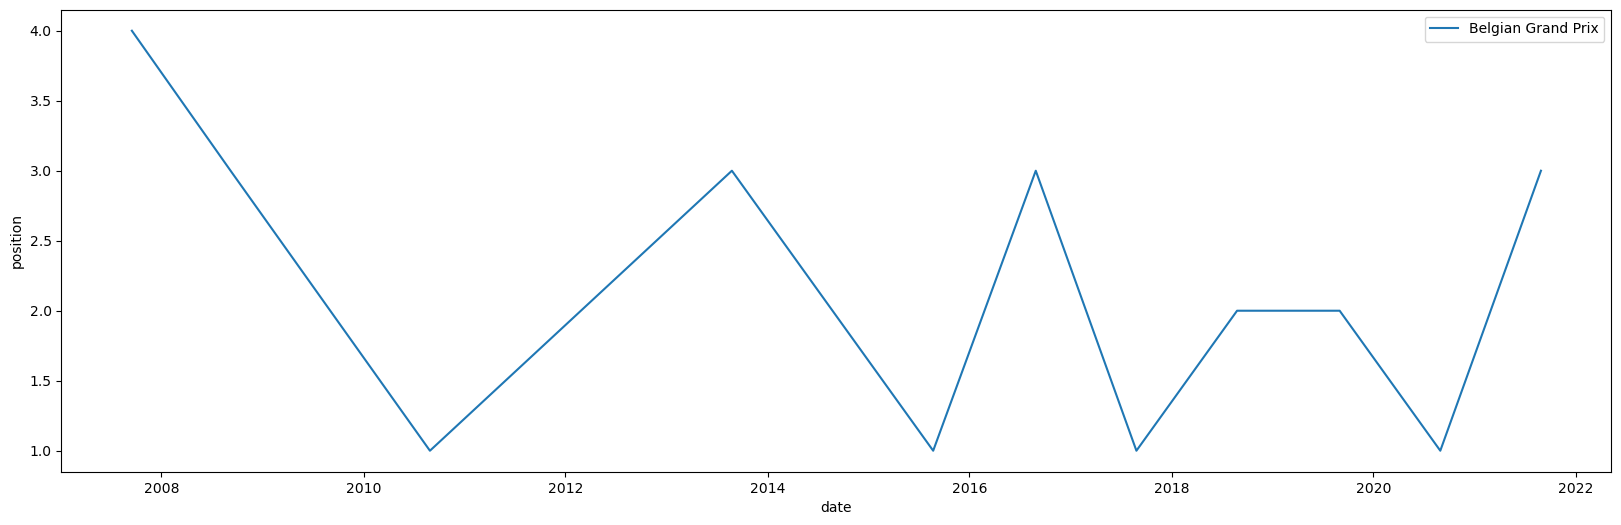

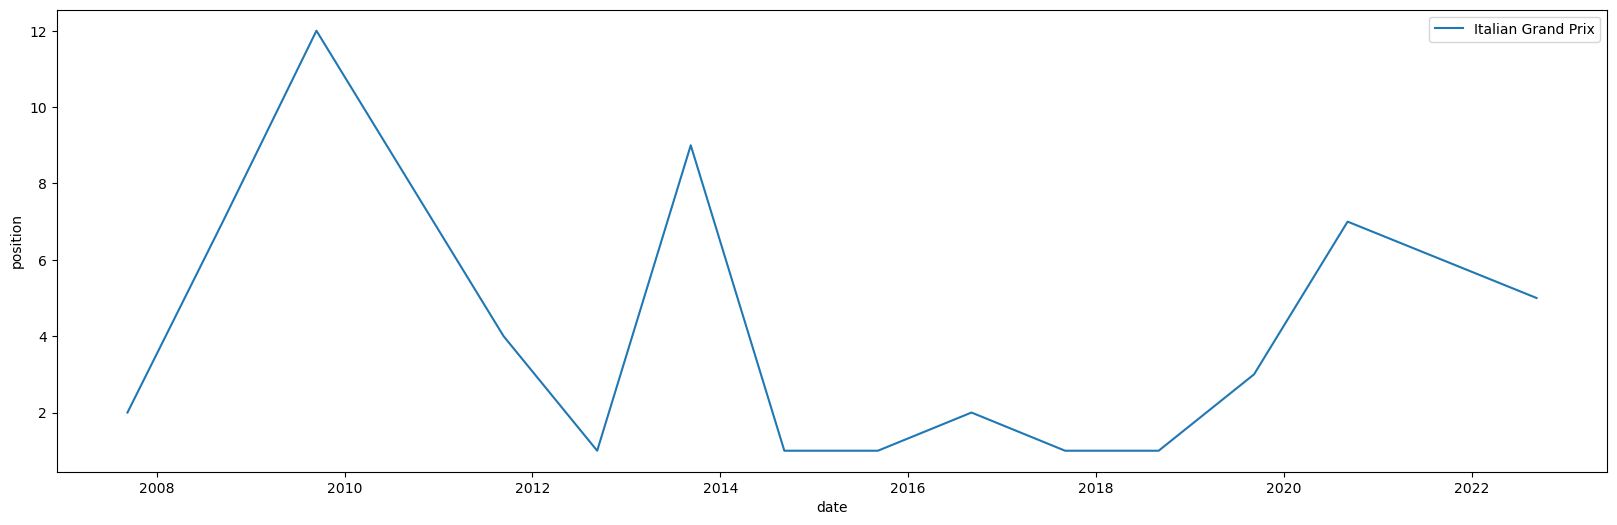

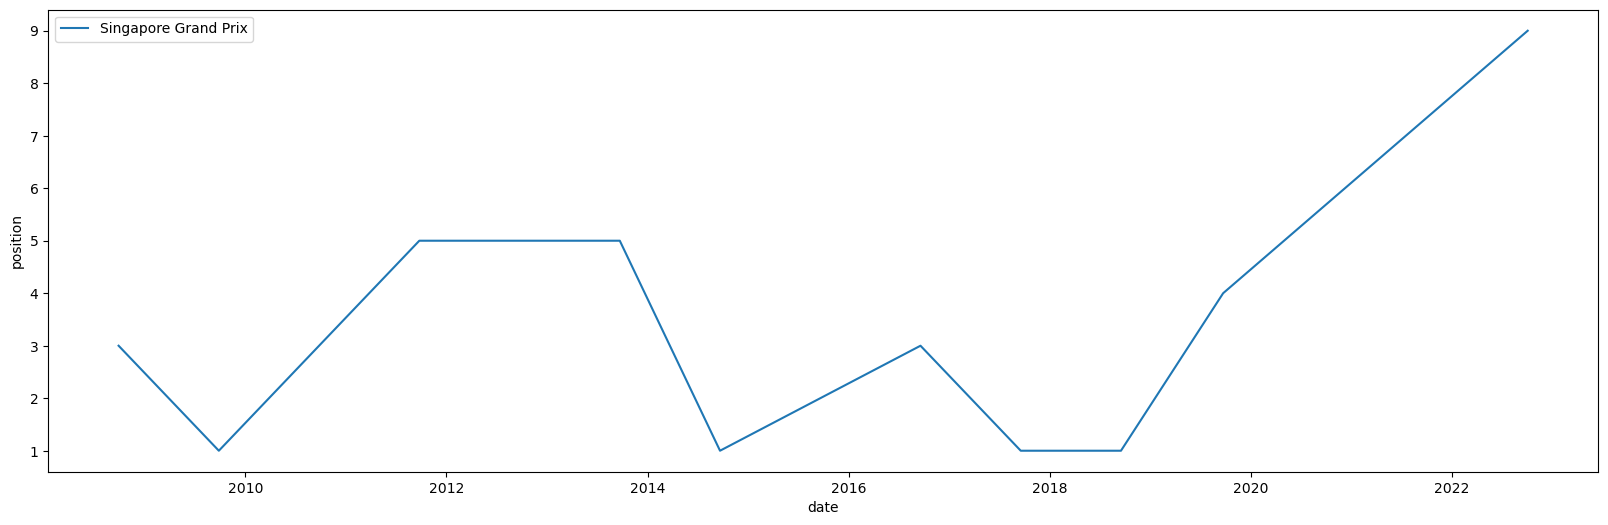

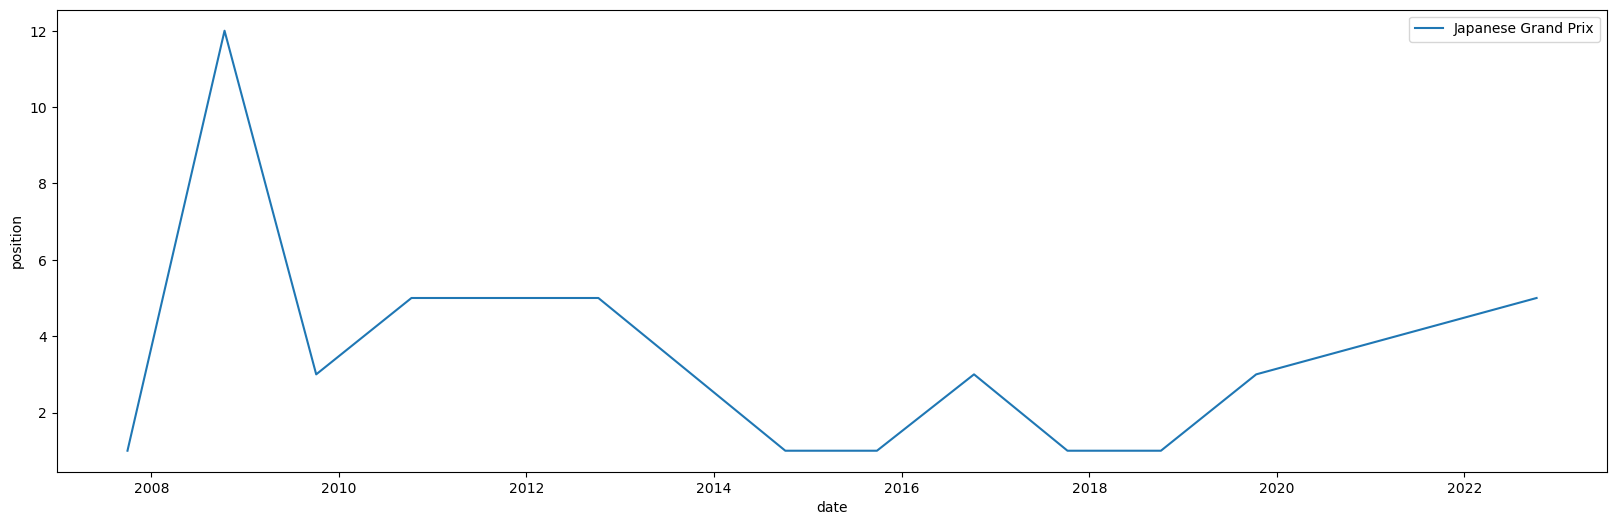

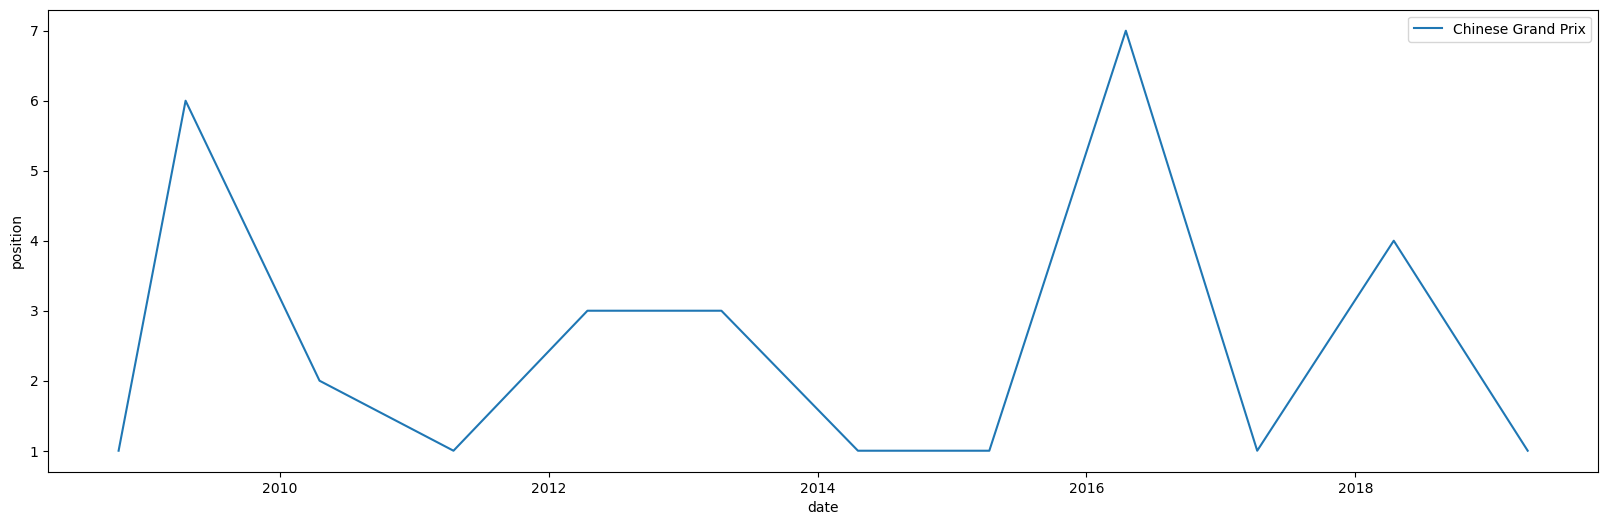

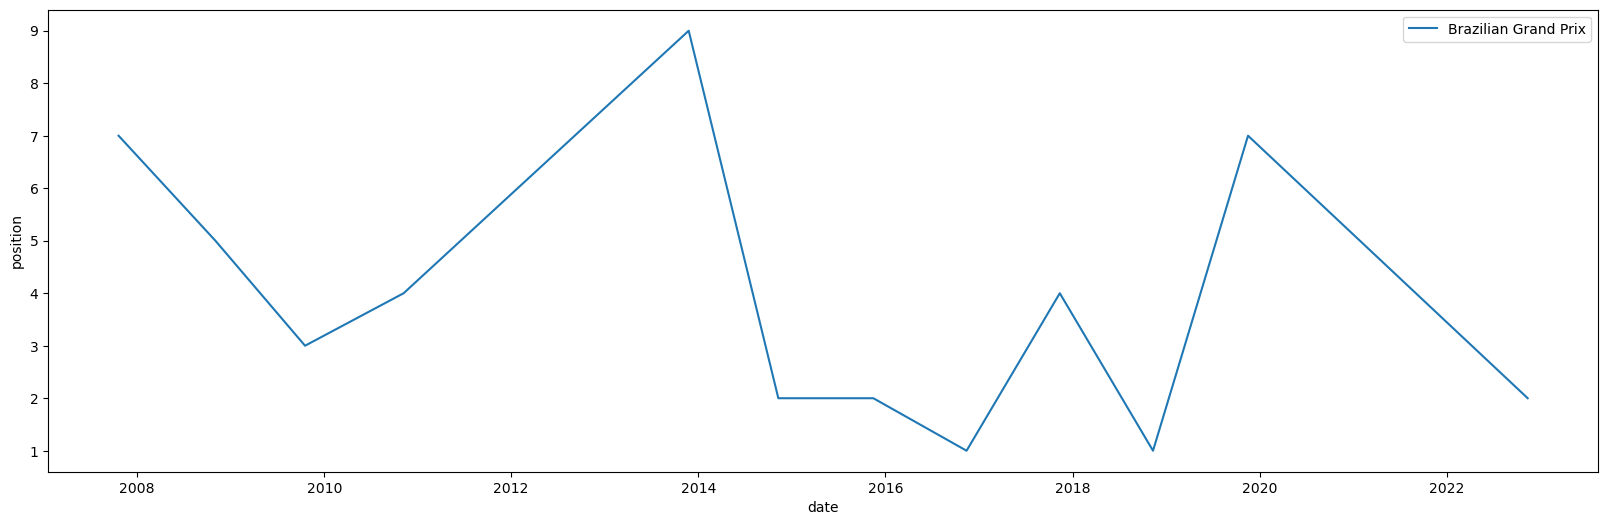

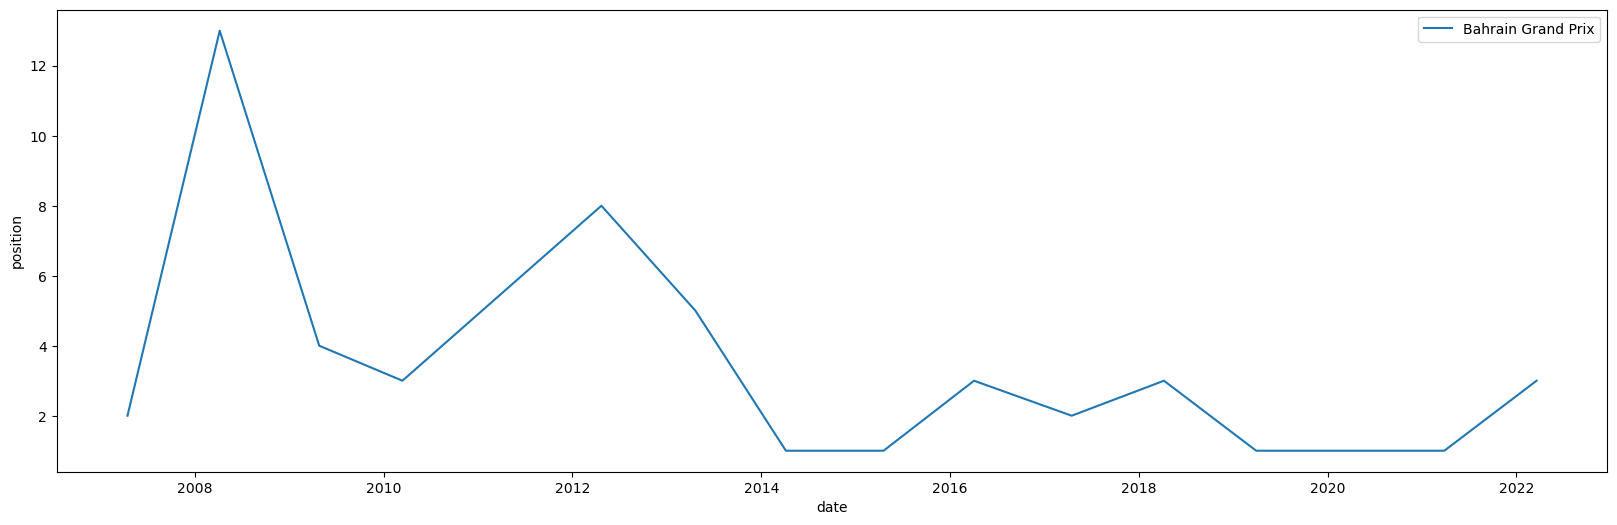

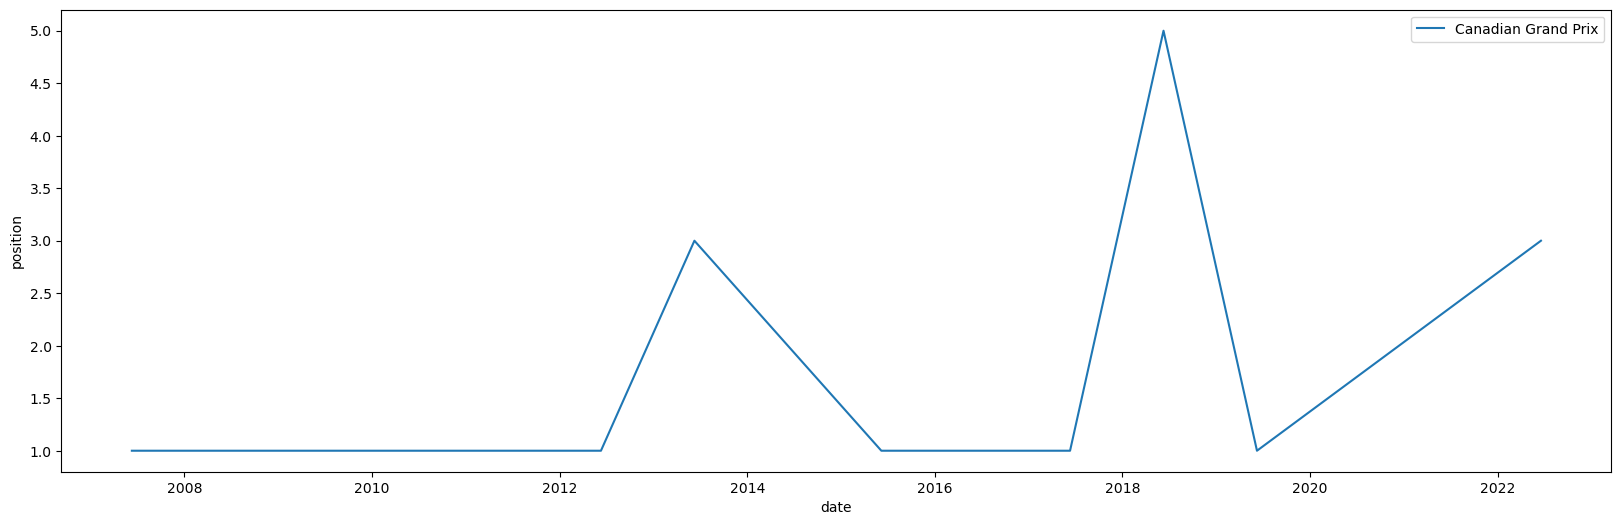

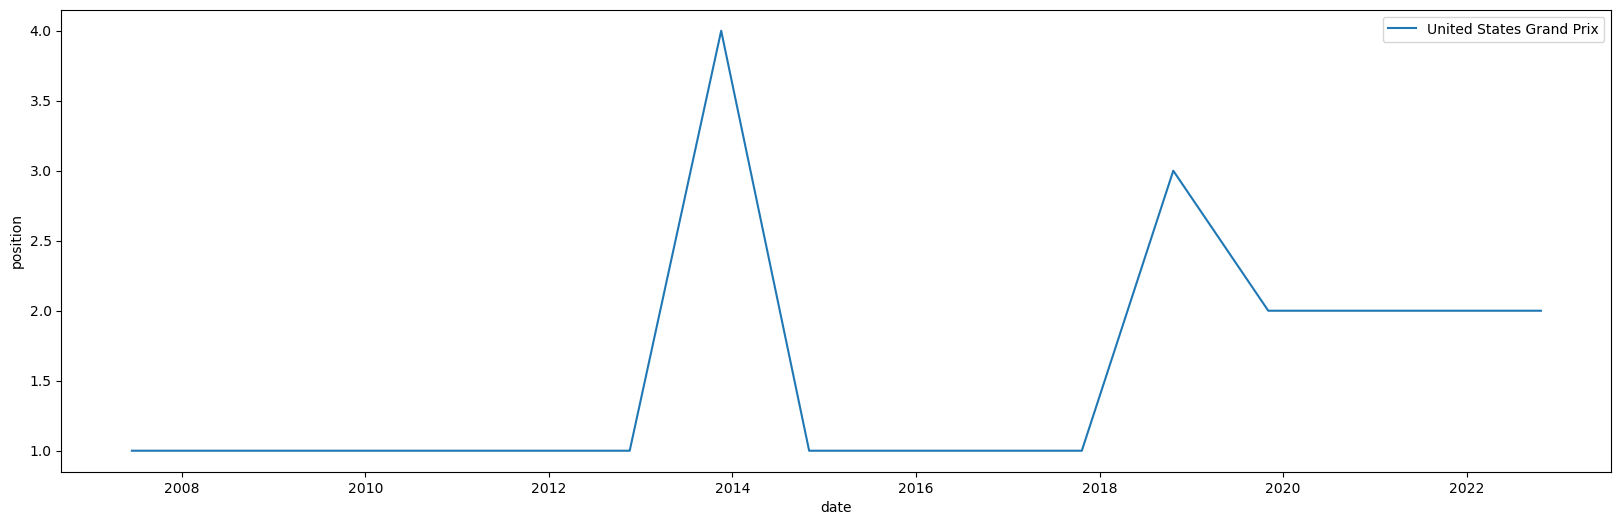

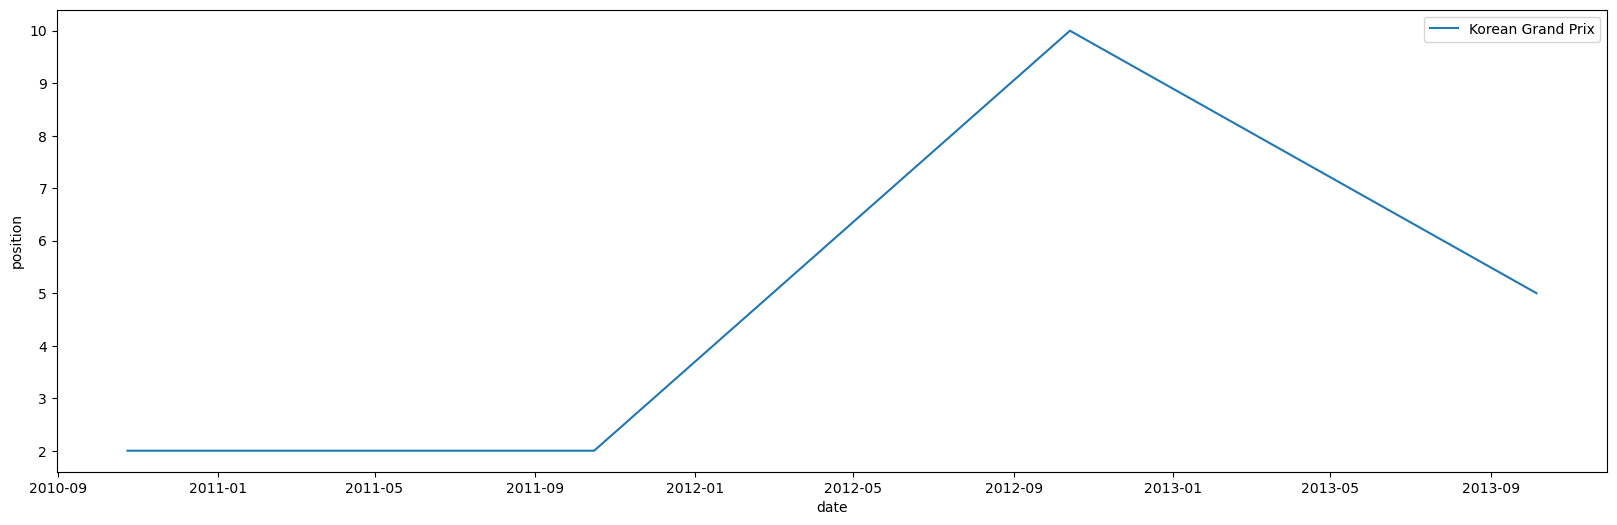

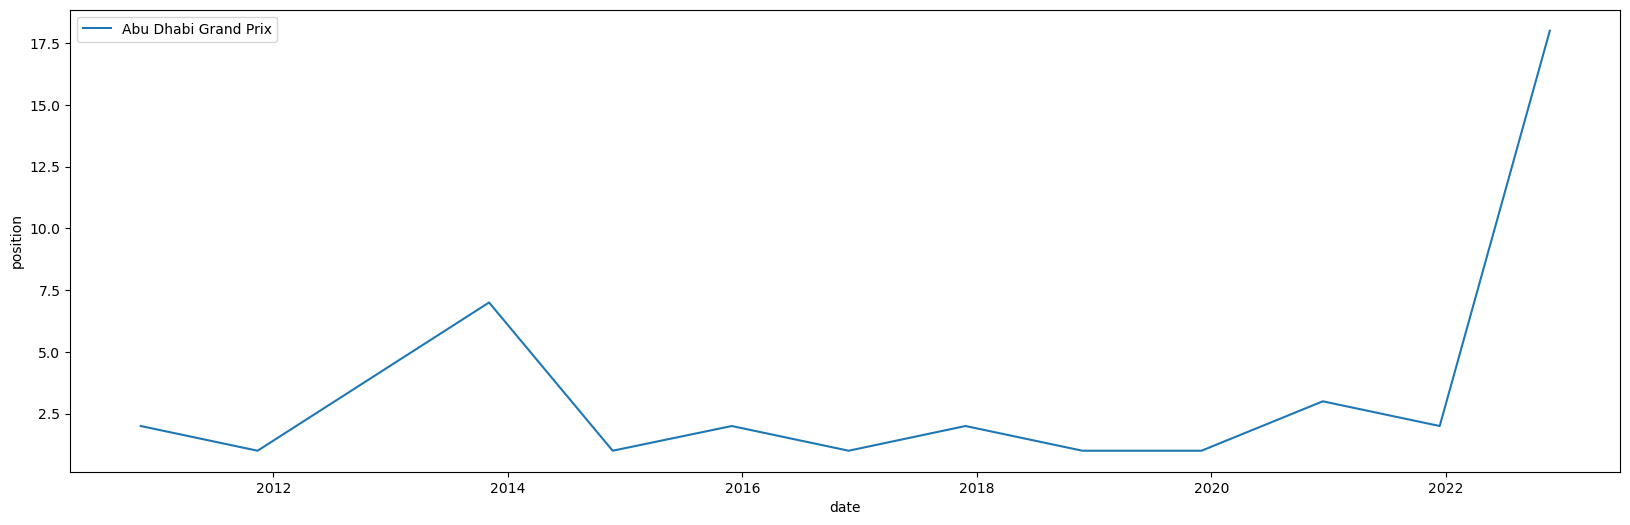

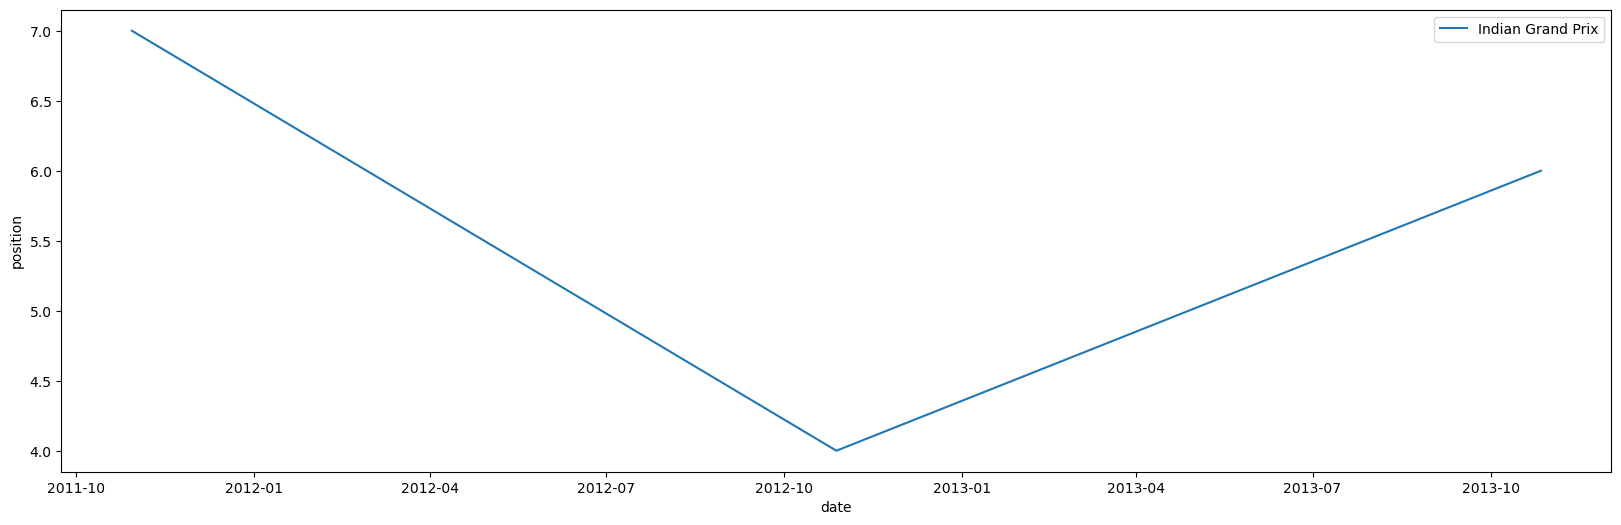

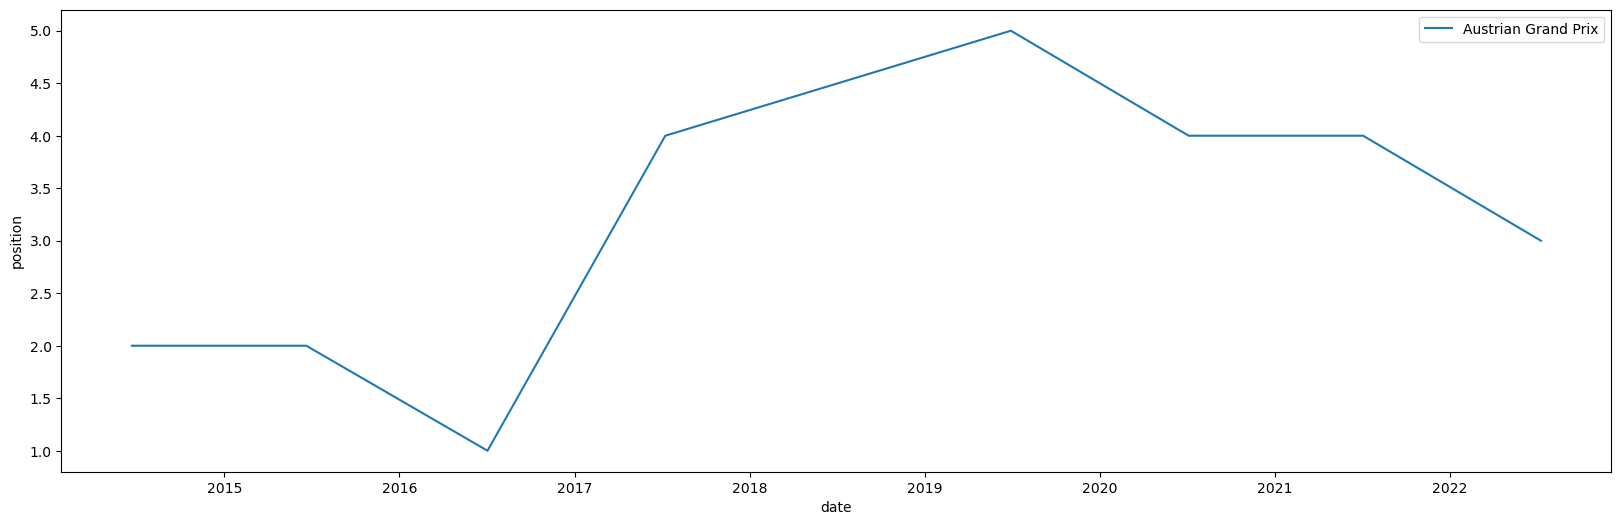

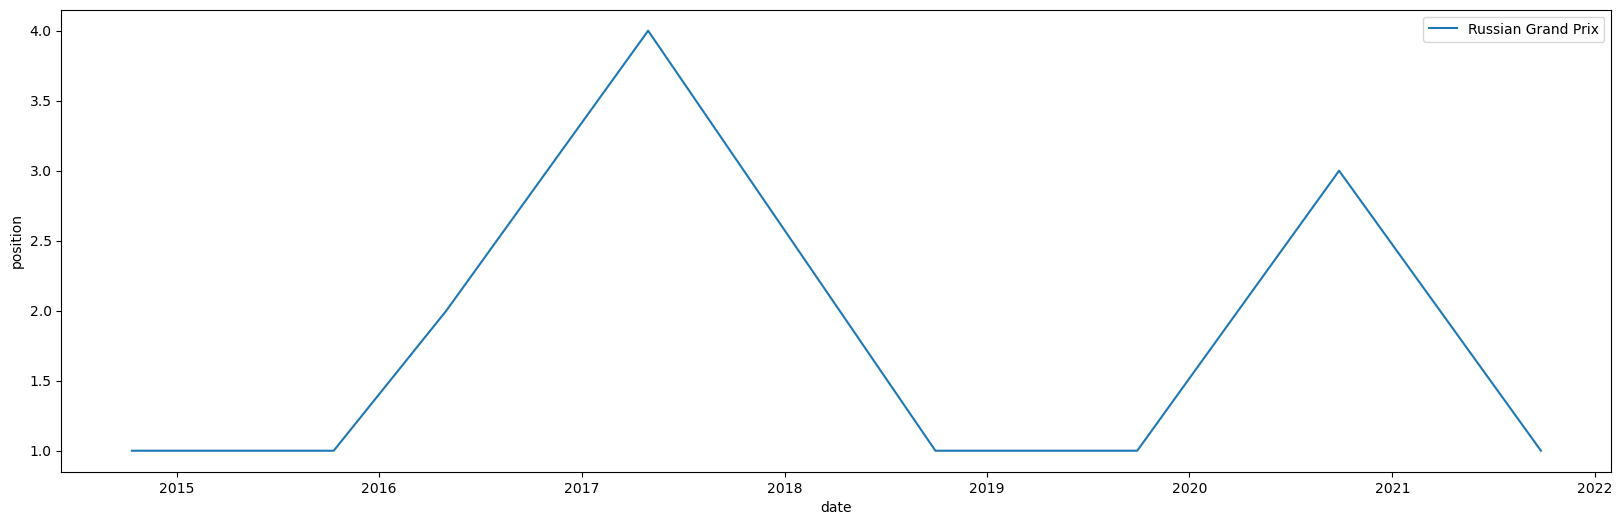

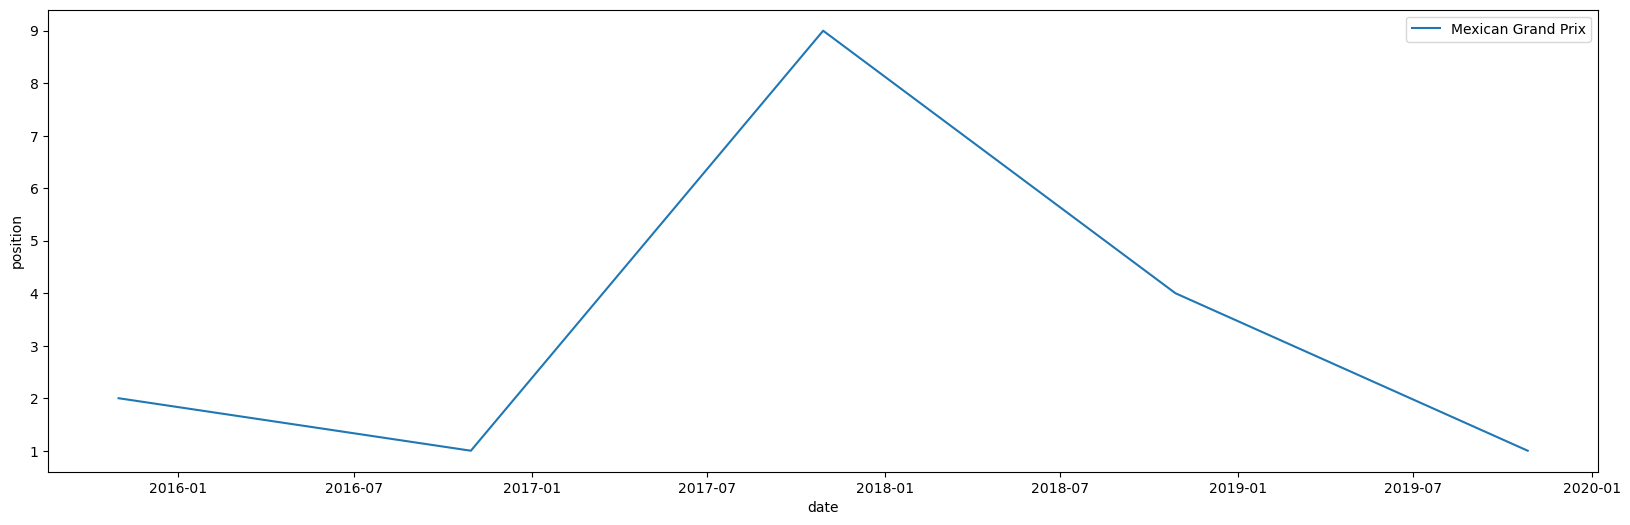

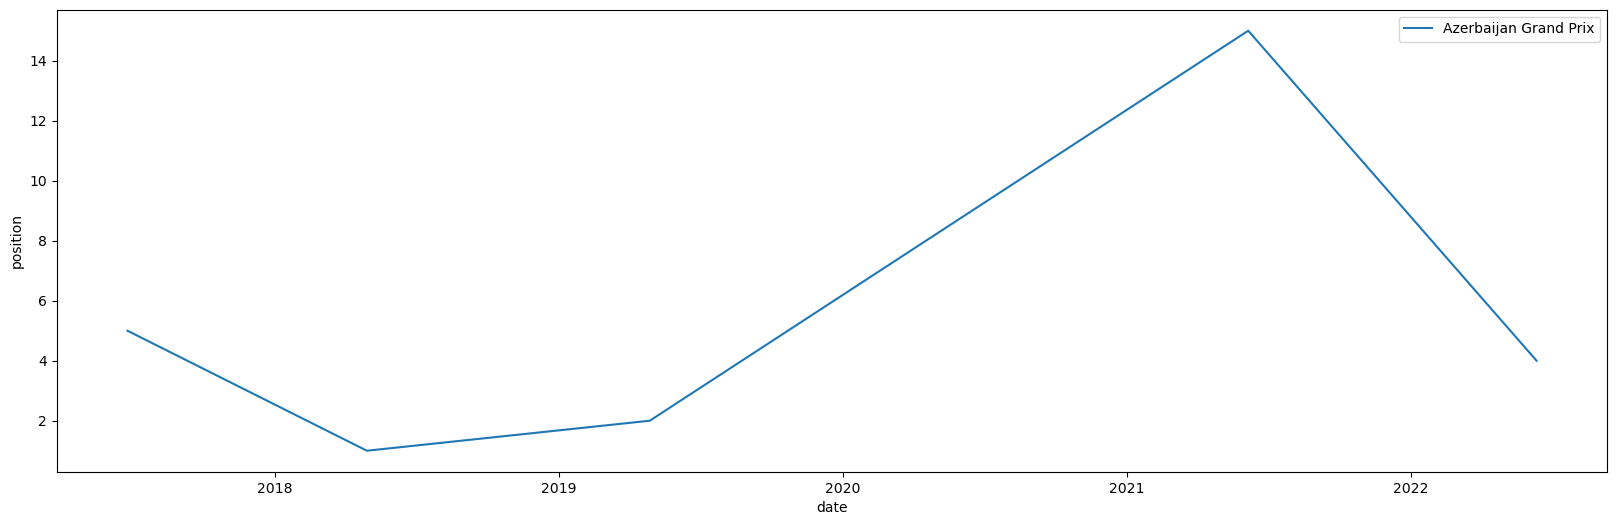

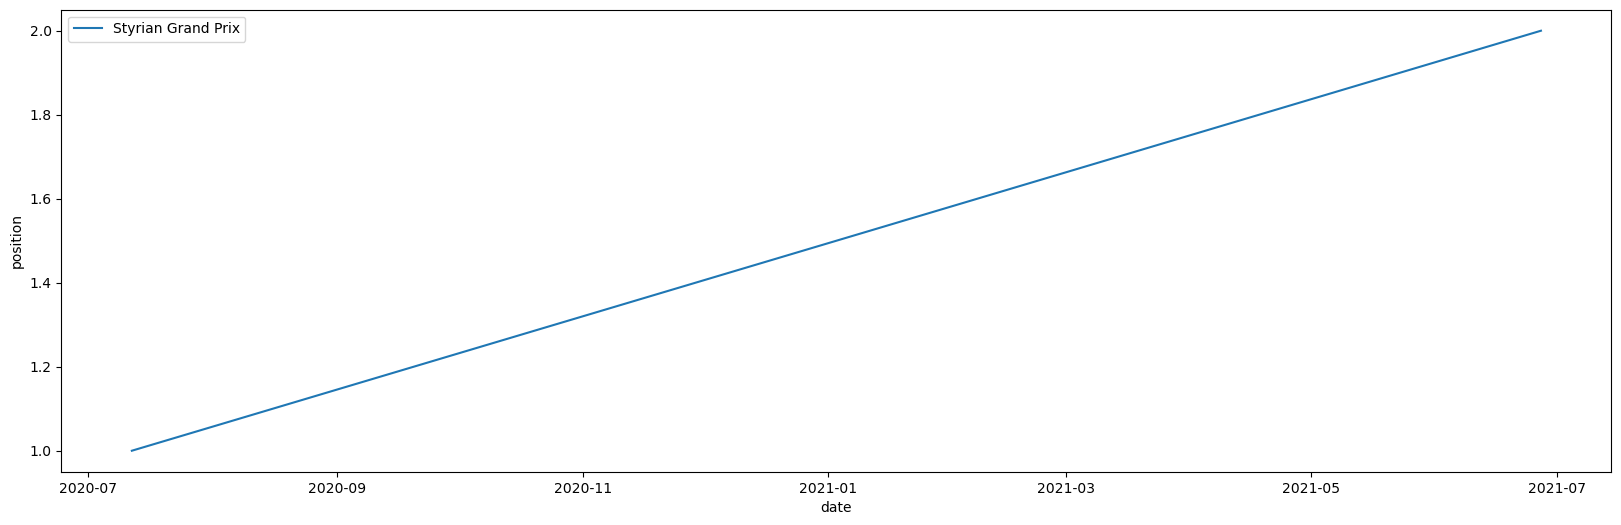

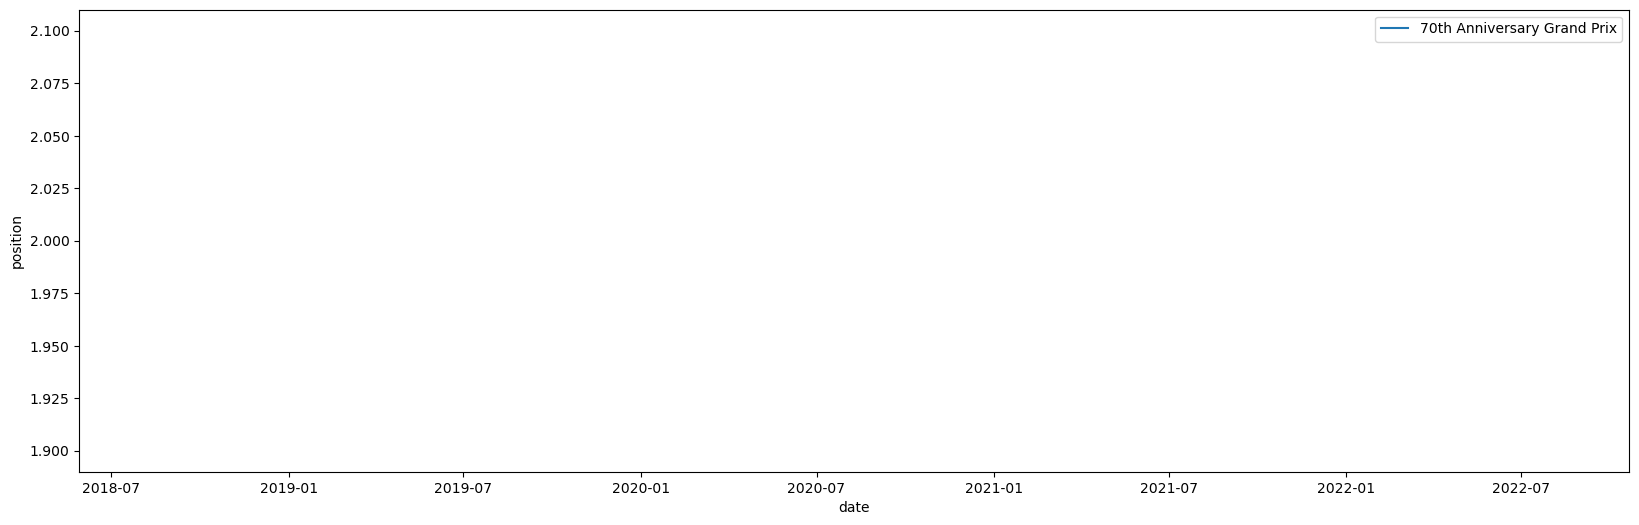

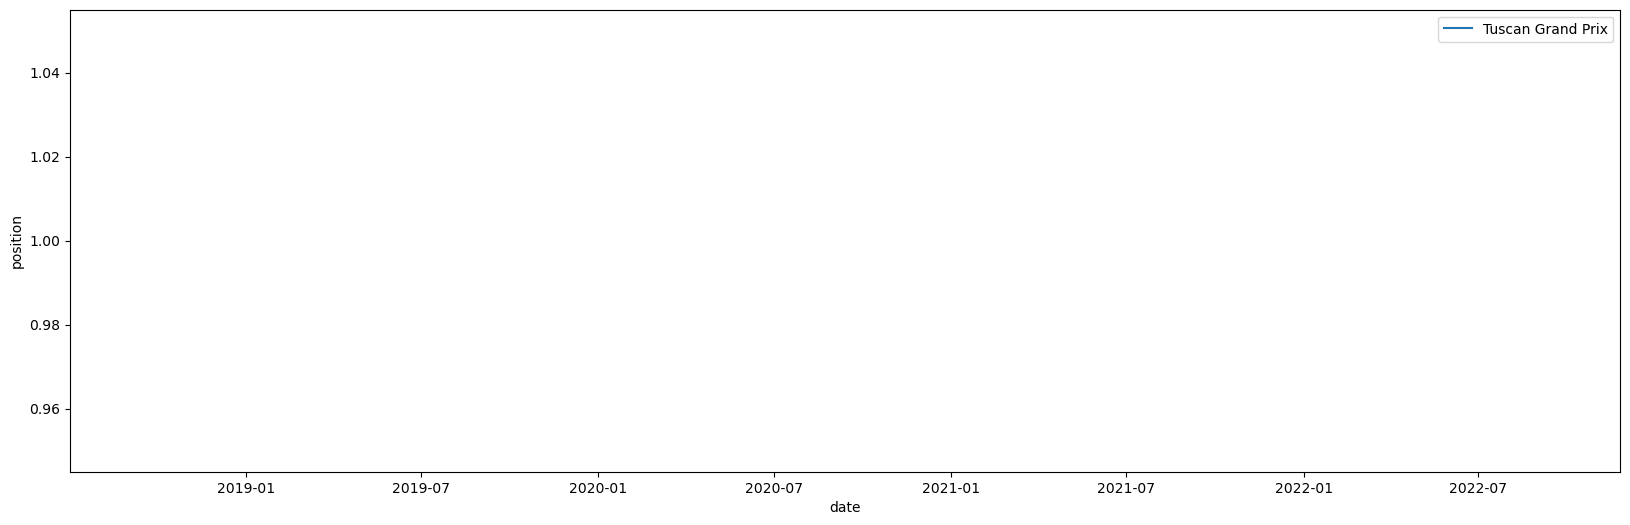

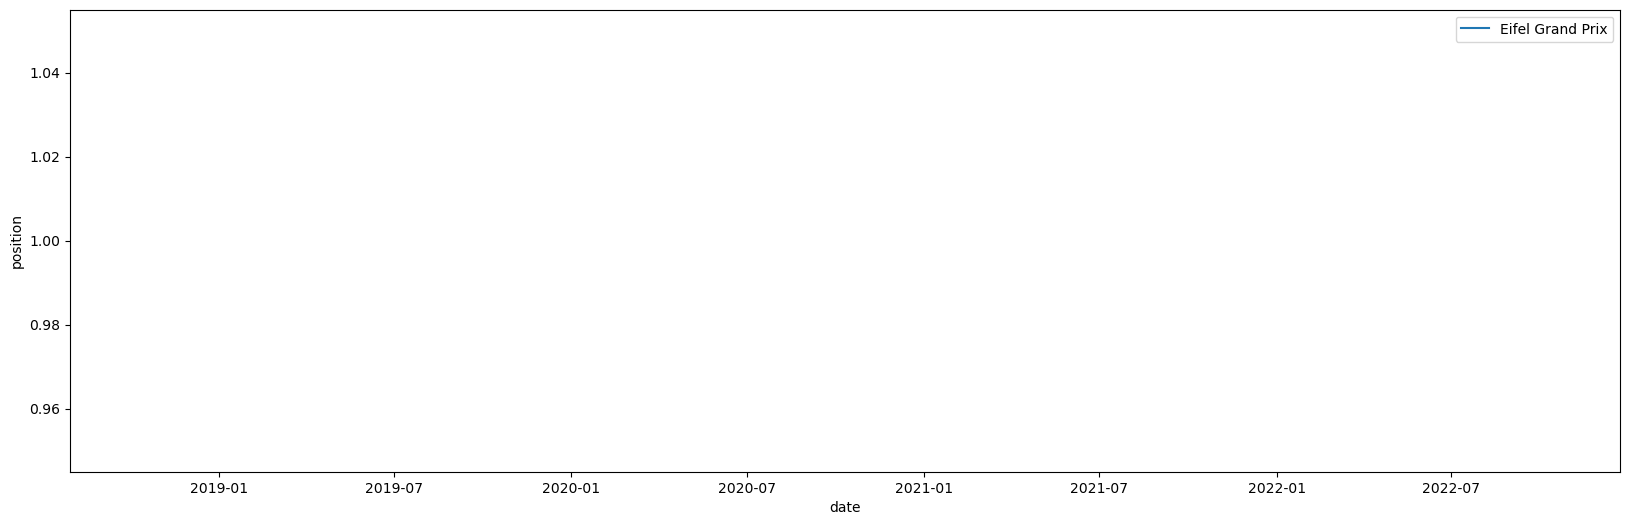

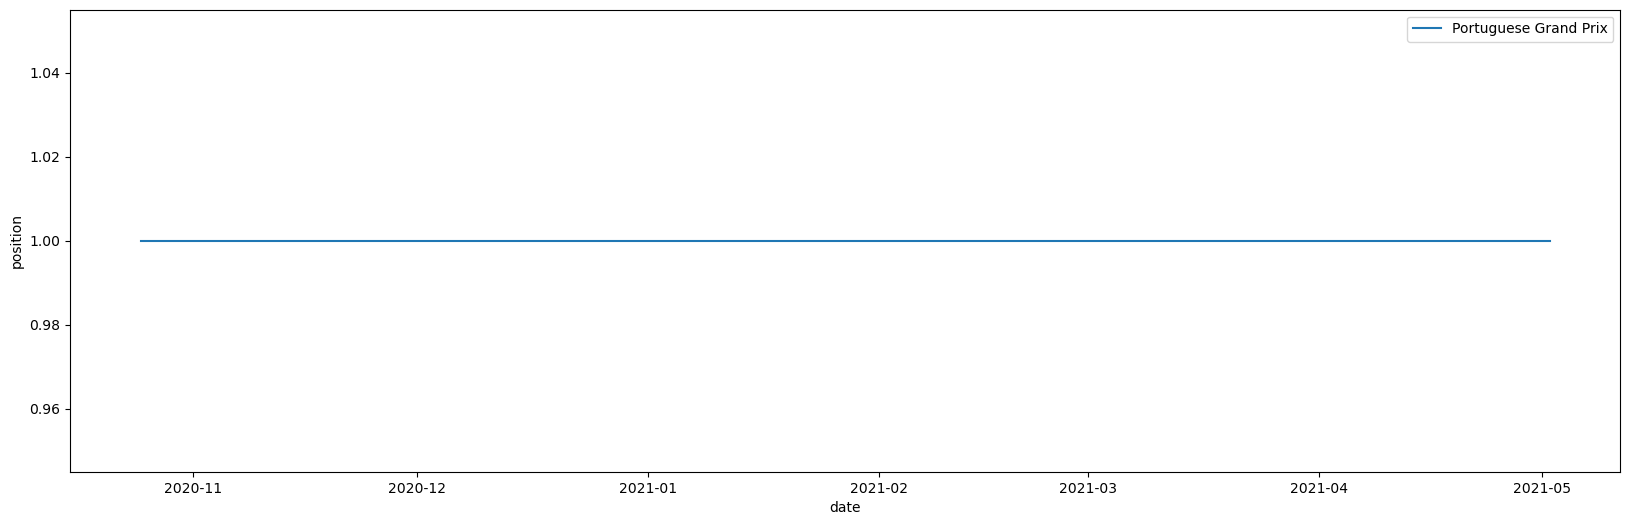

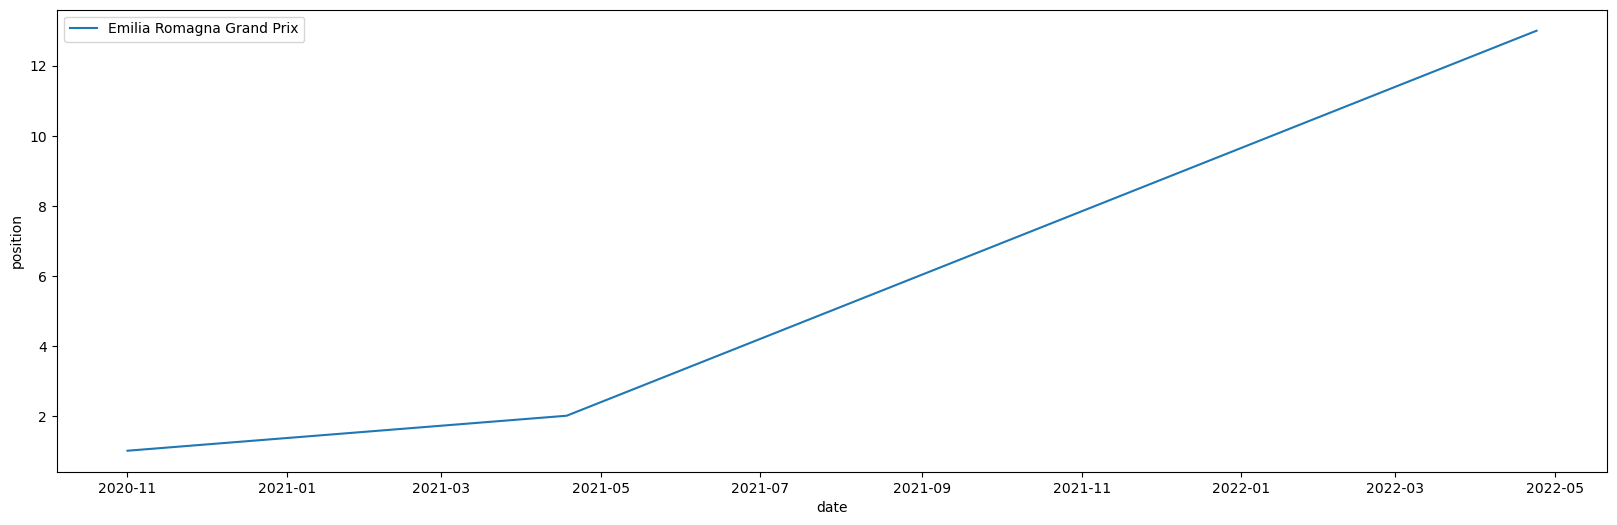

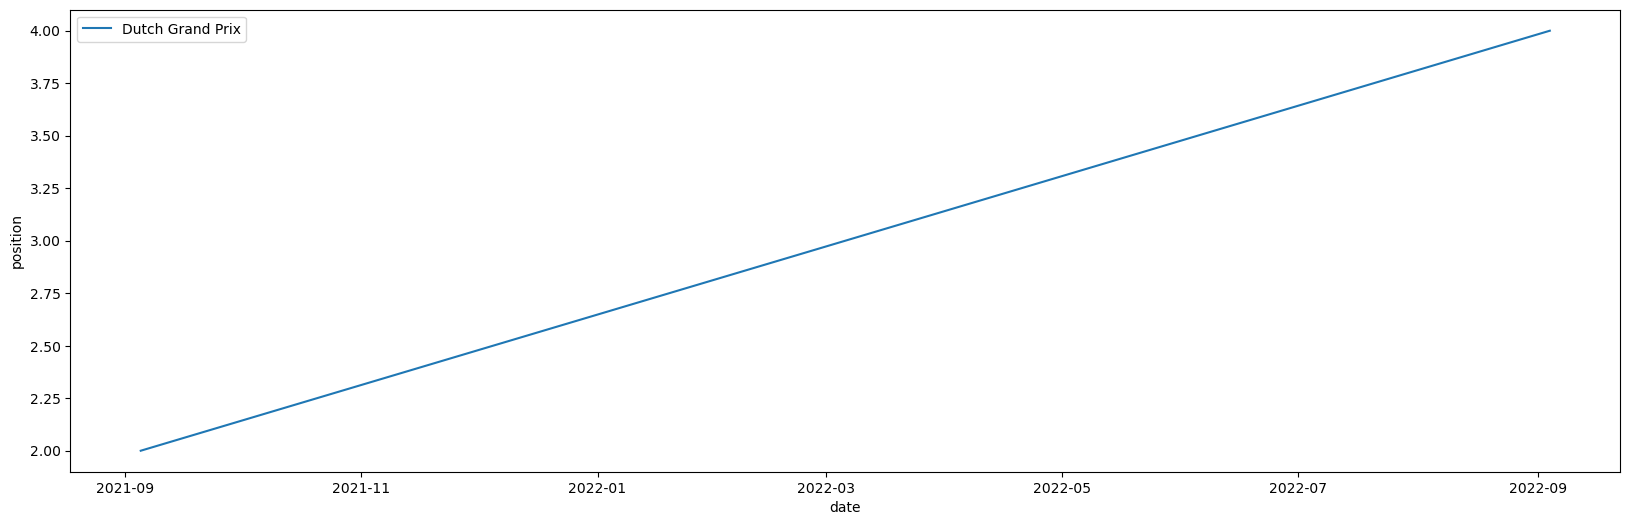

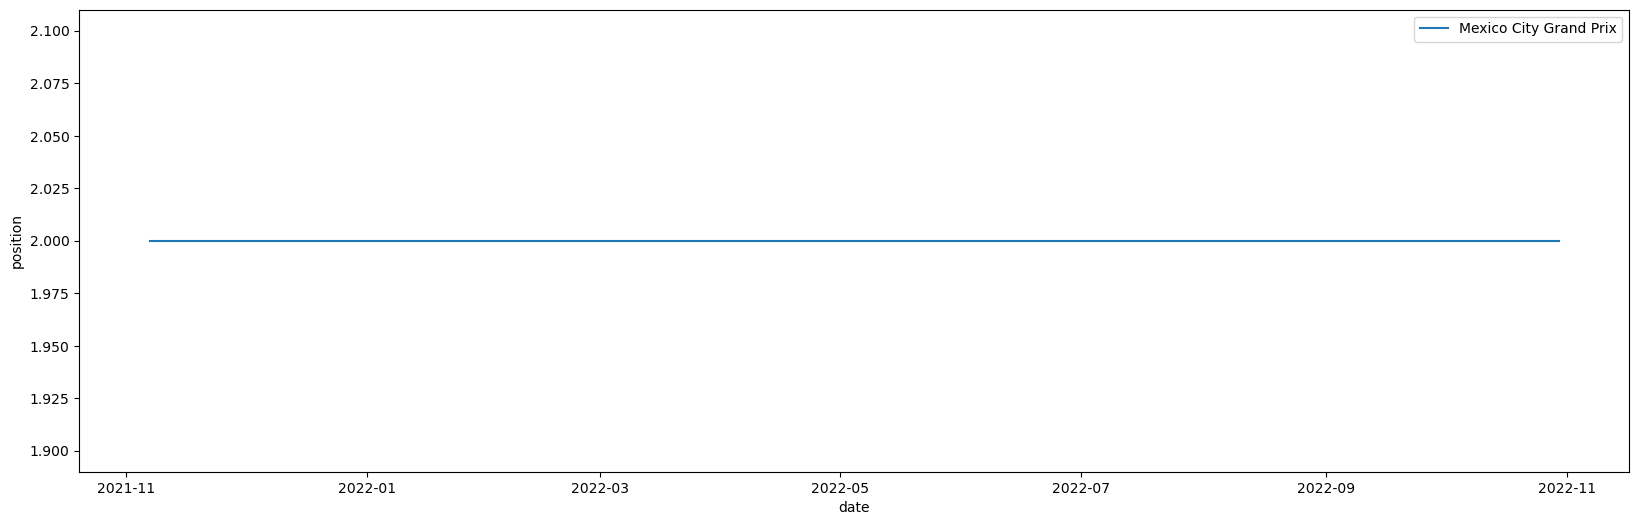

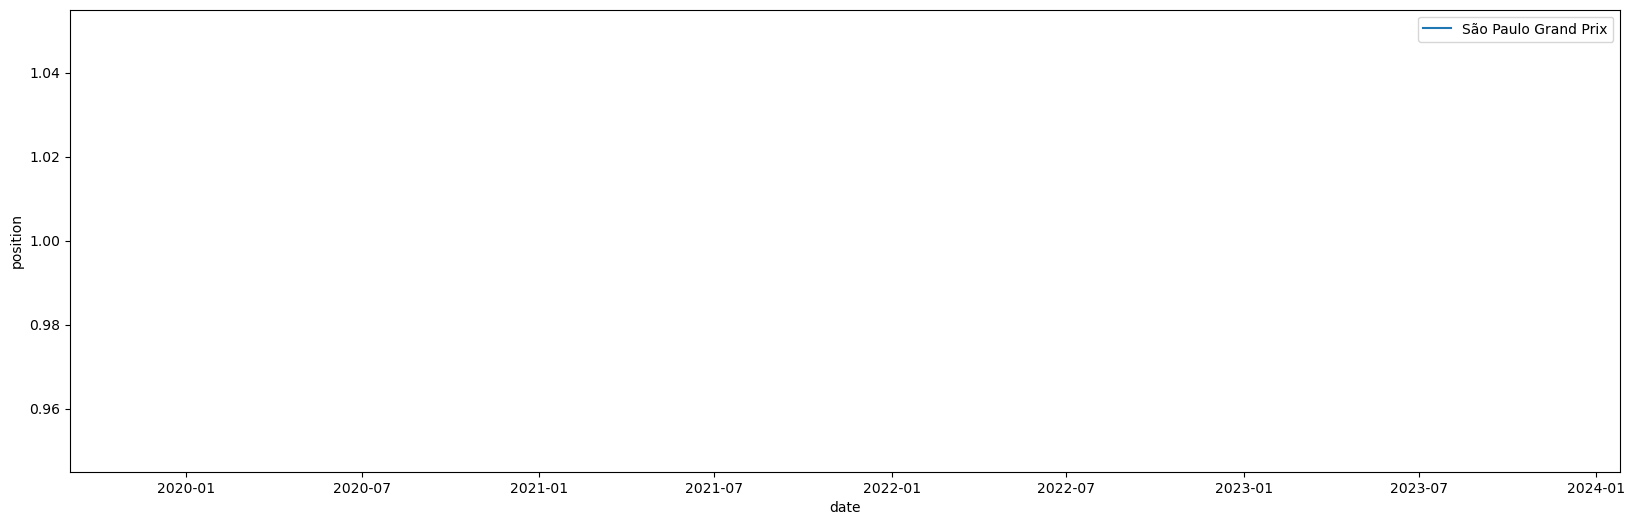

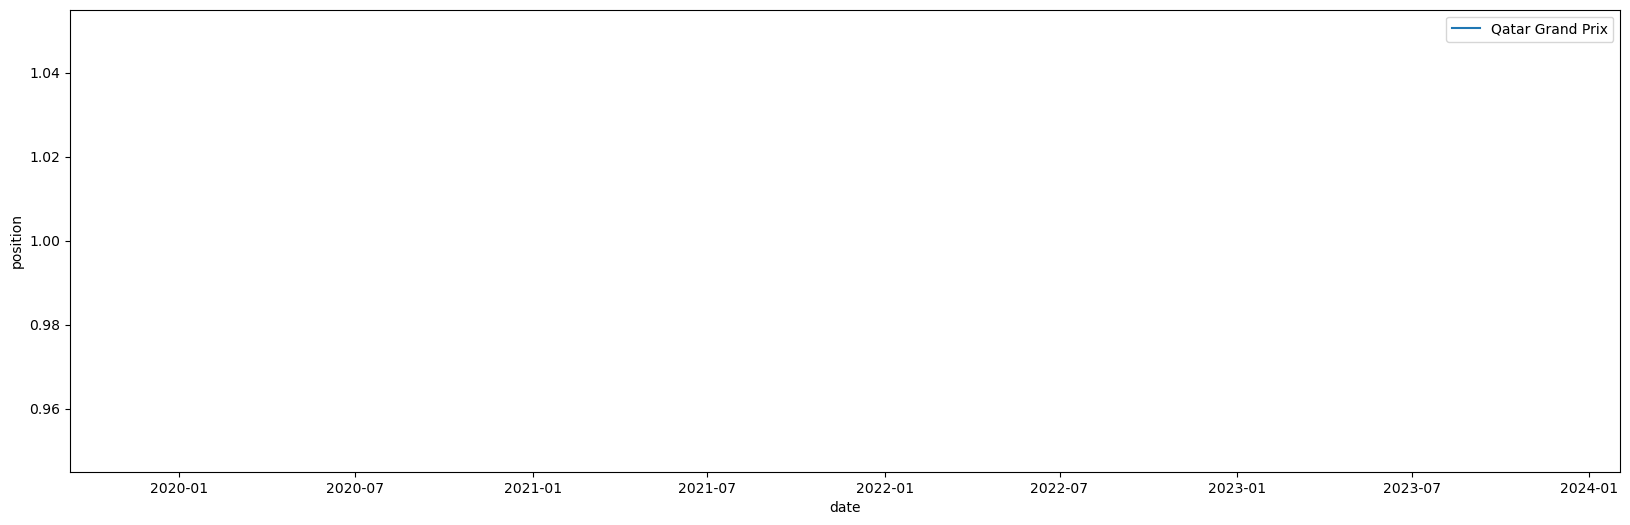

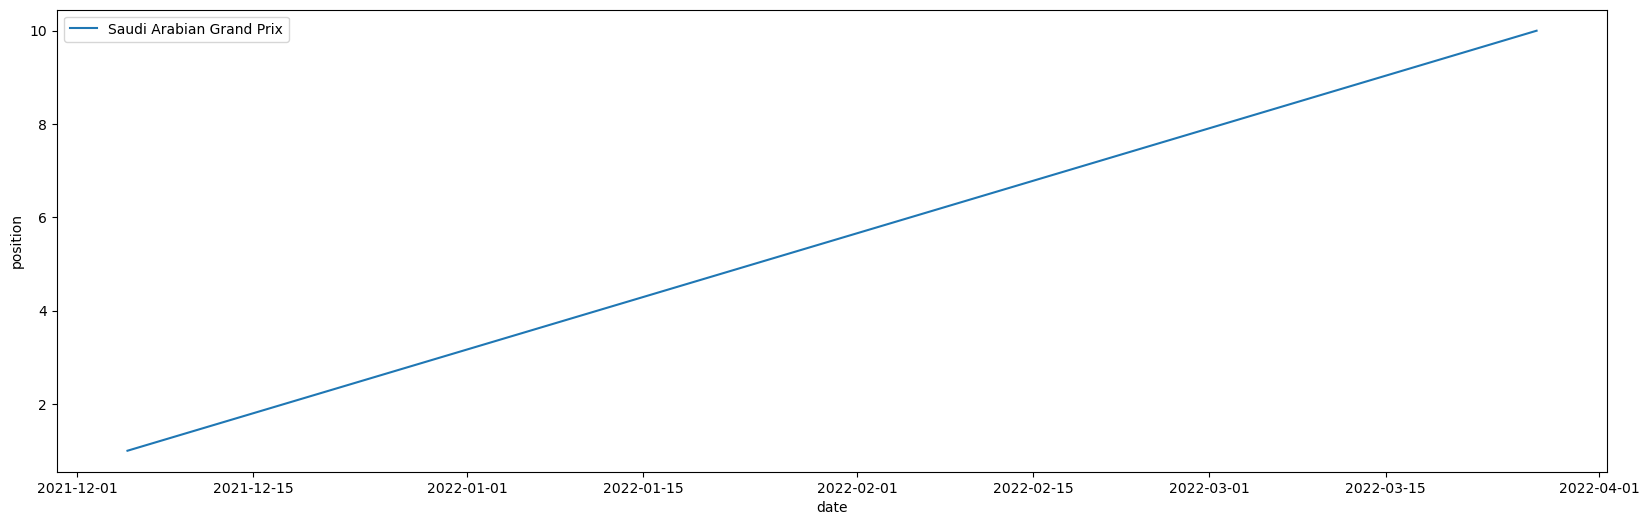

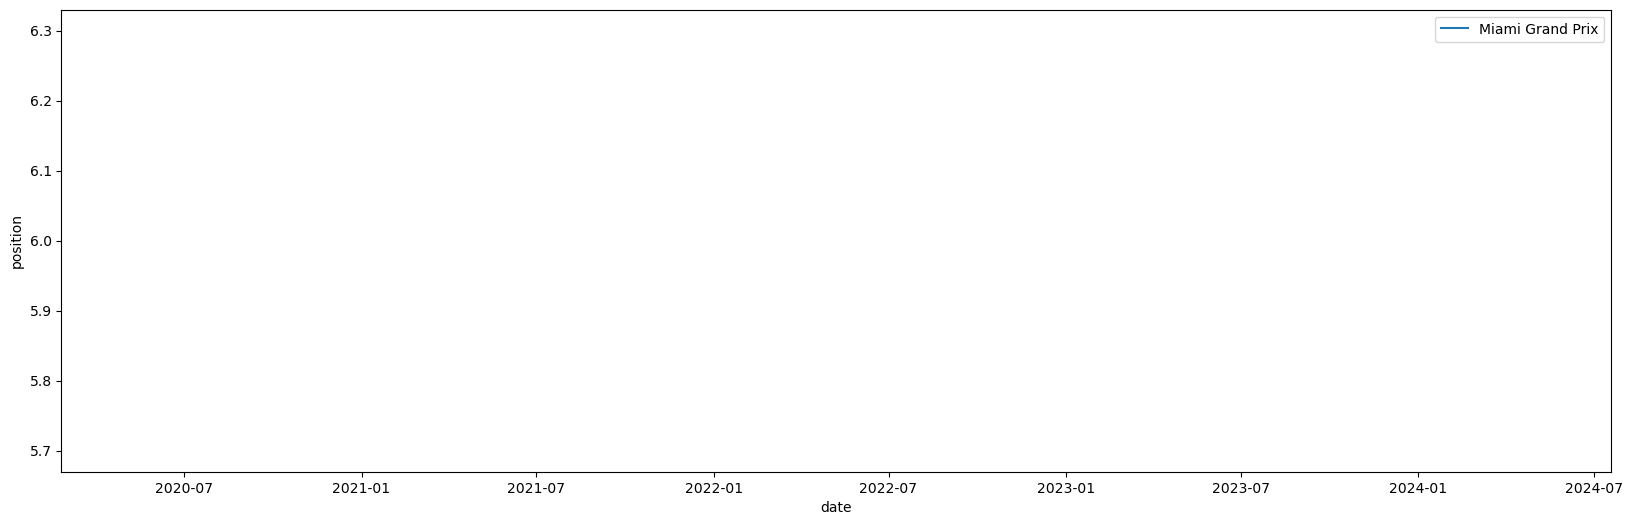

In [19]:
for i in dfHamilton['name_x'].unique():
    dfHamRace = dfHamilton[(dfHamilton["name_x"].str.contains(i))]
    plt.subplots(figsize=(20,6))
    sns.lineplot(x="date", y="position", data=dfHamRace, label=i)
plt.show()    

C:\Users\Adam\Documents\FormationGreta\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


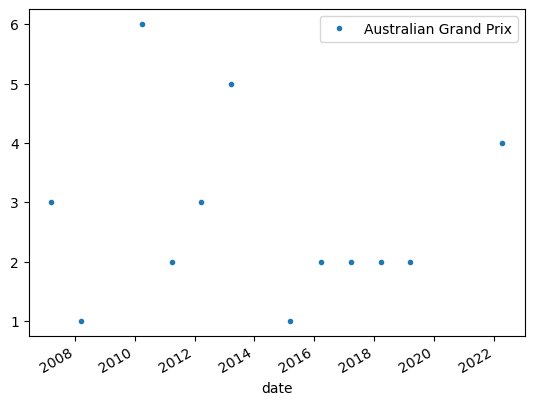

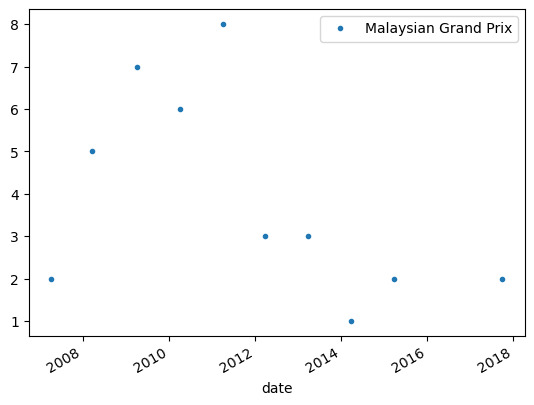

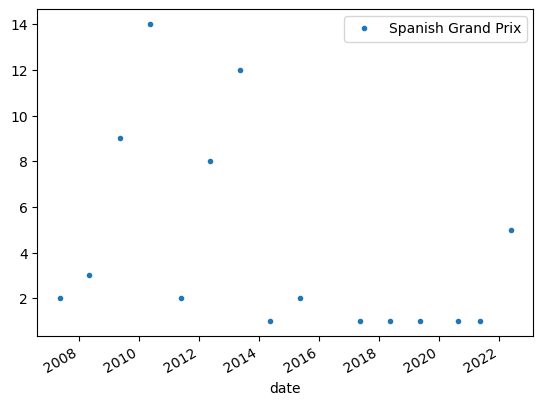

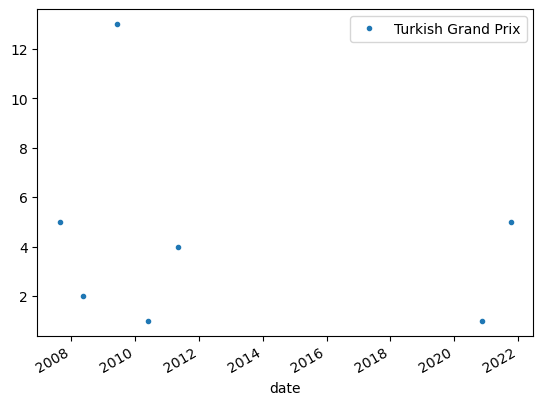

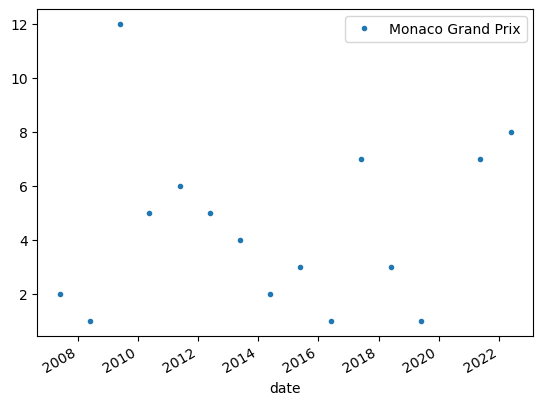

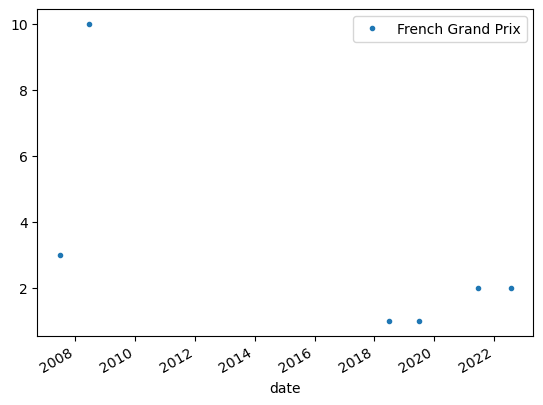

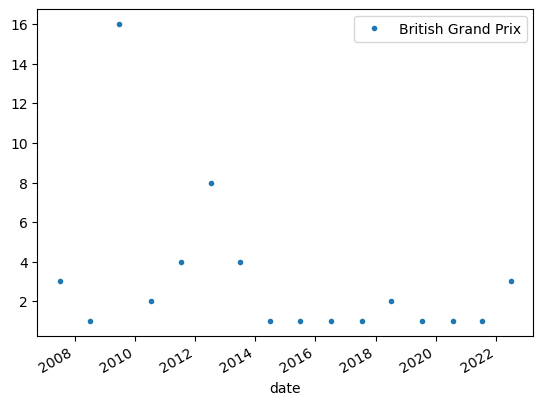

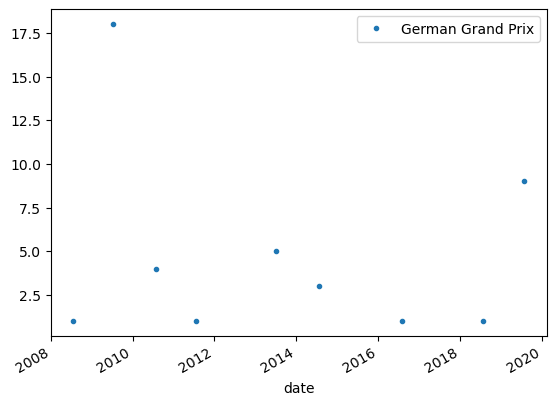

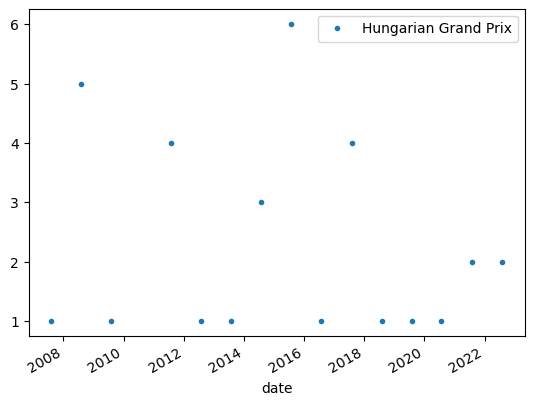

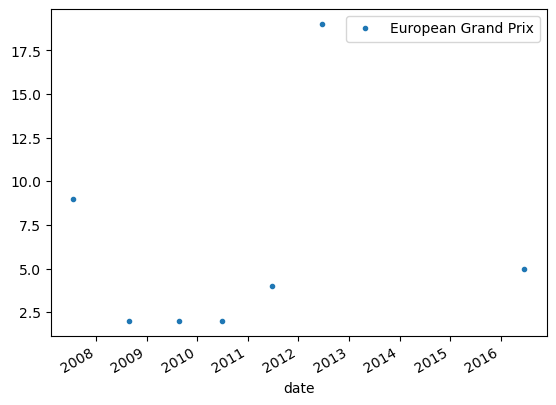

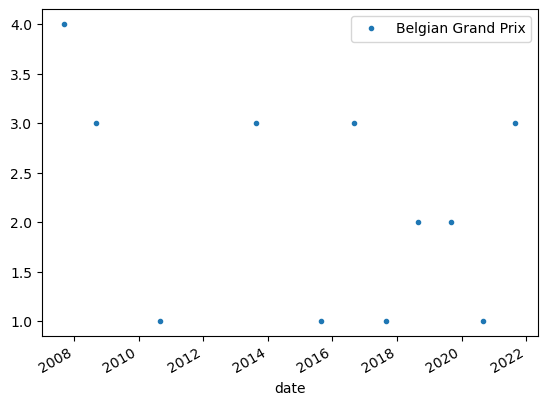

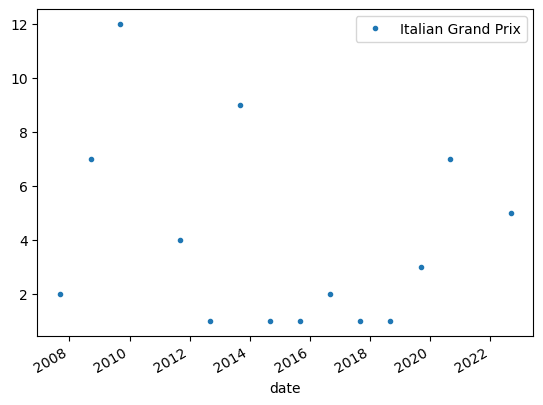

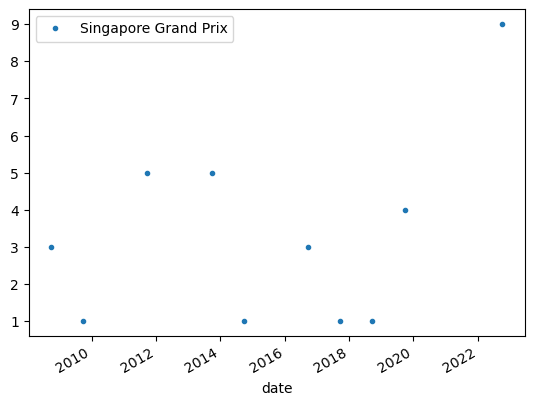

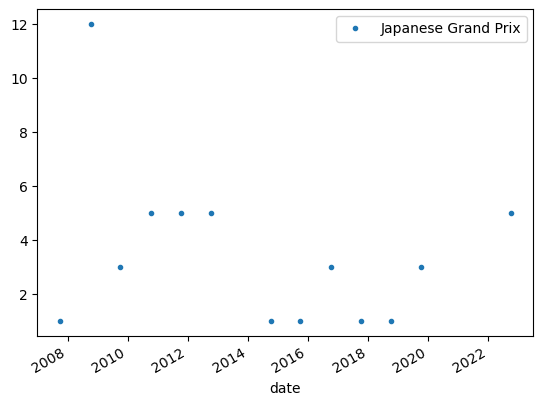

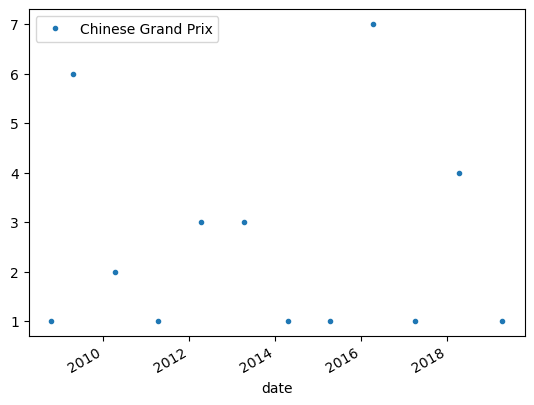

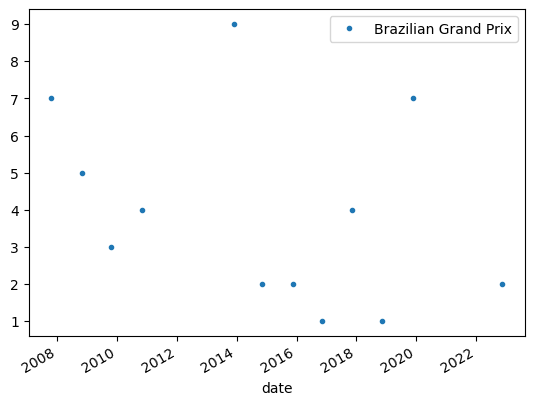

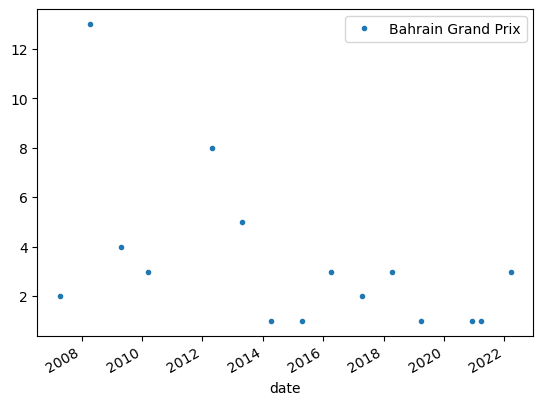

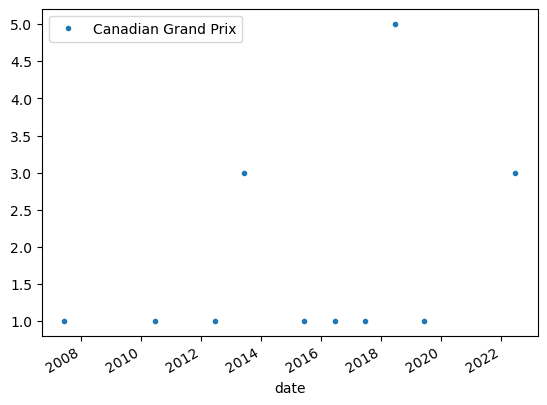

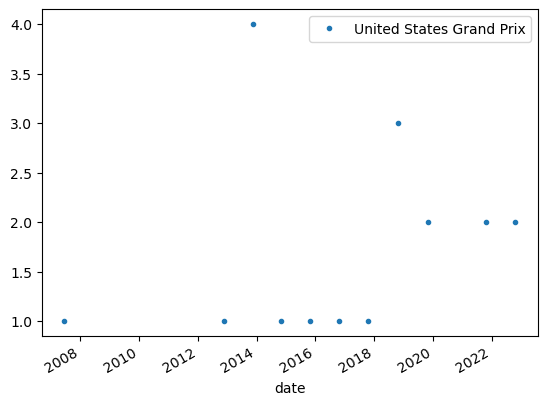

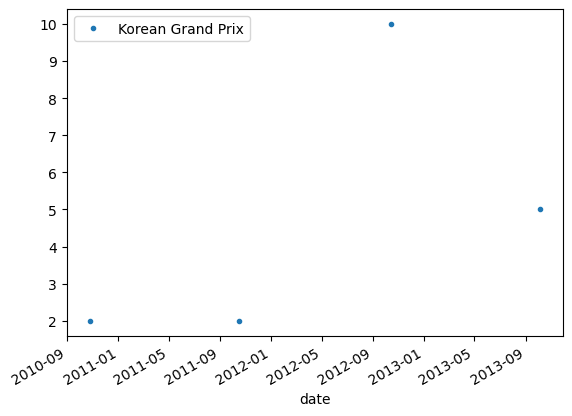

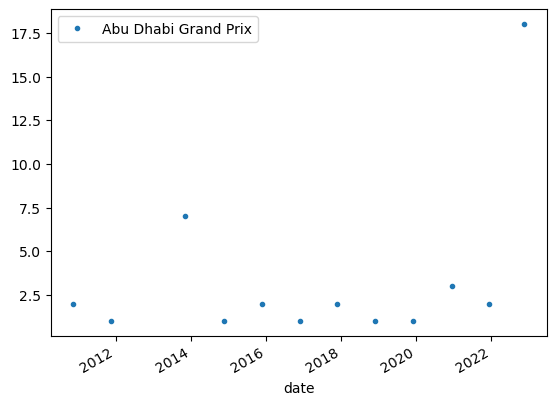

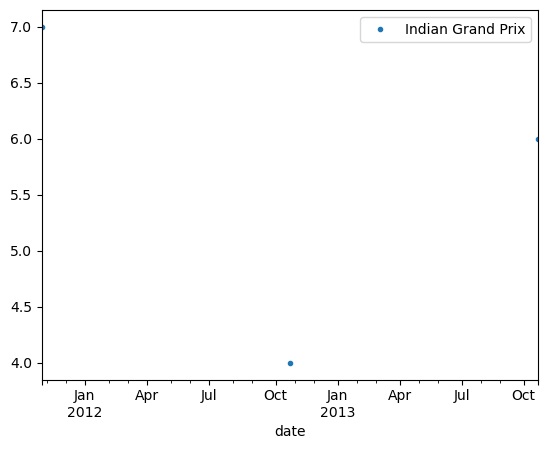

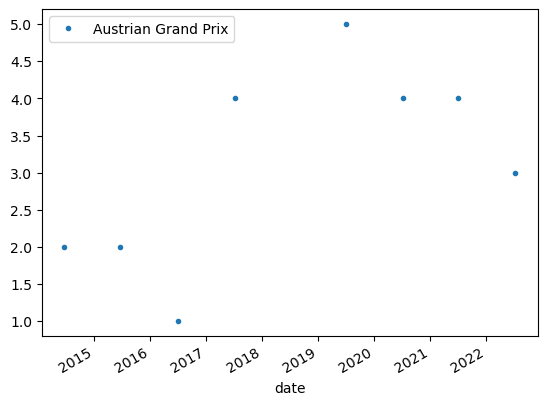

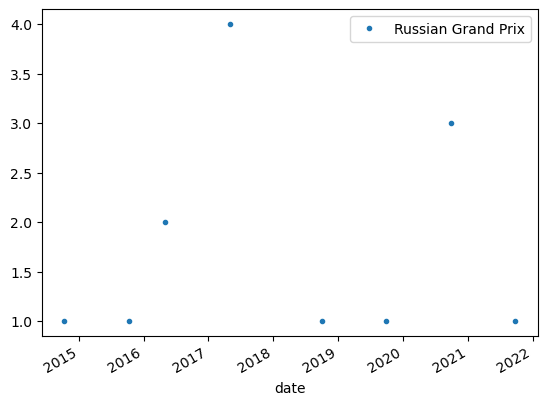

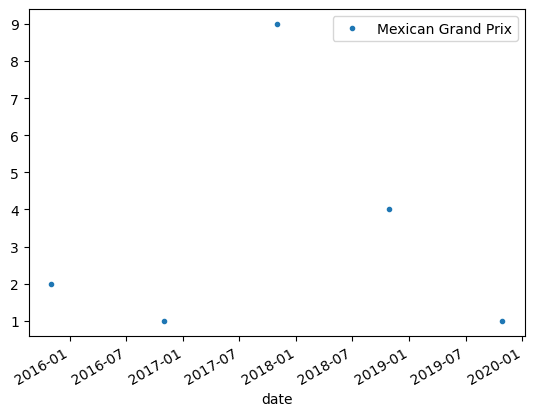

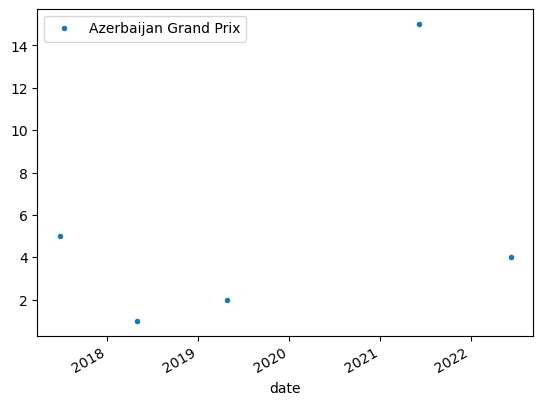

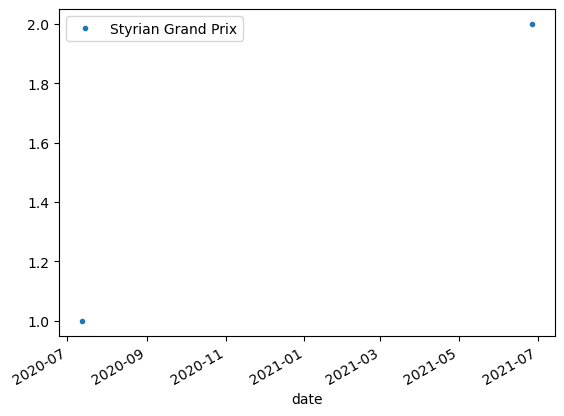

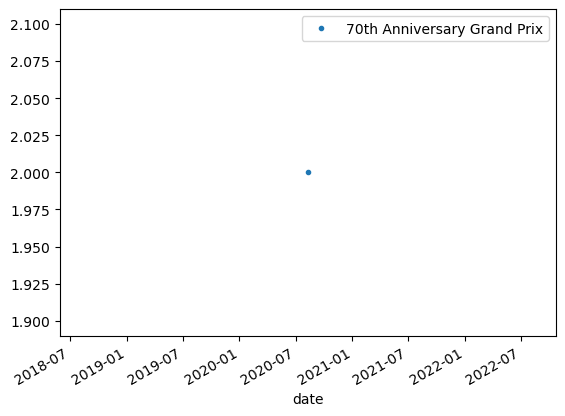

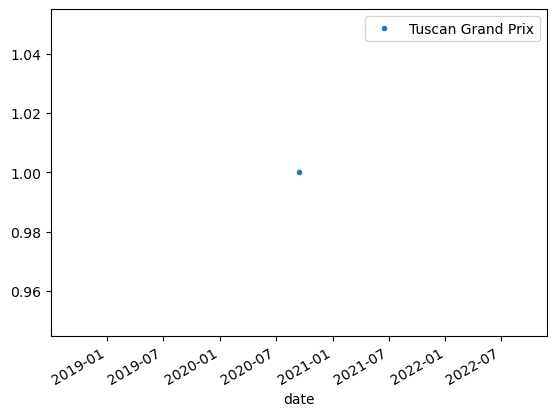

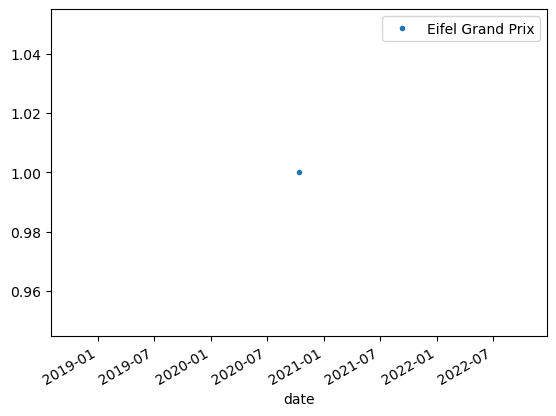

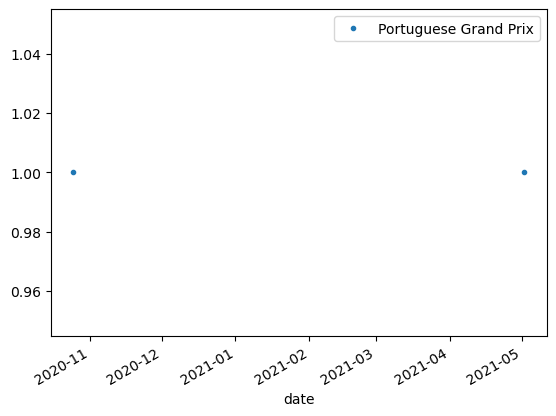

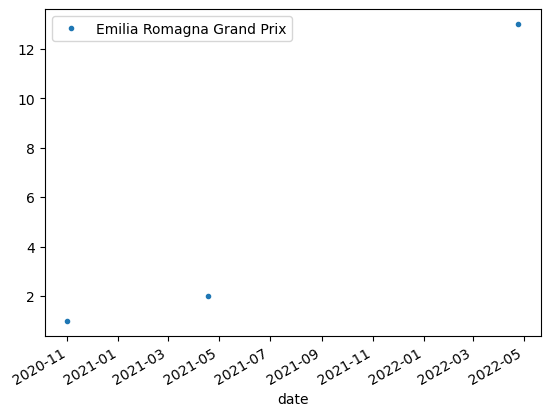

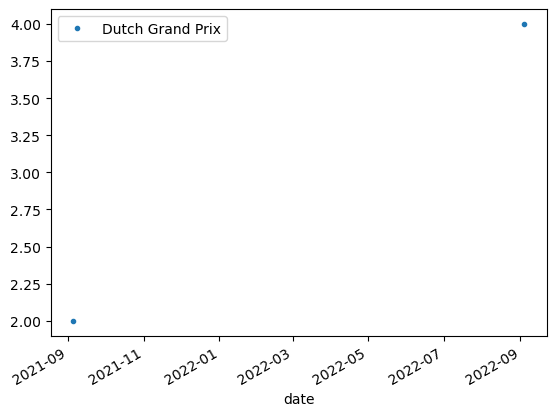

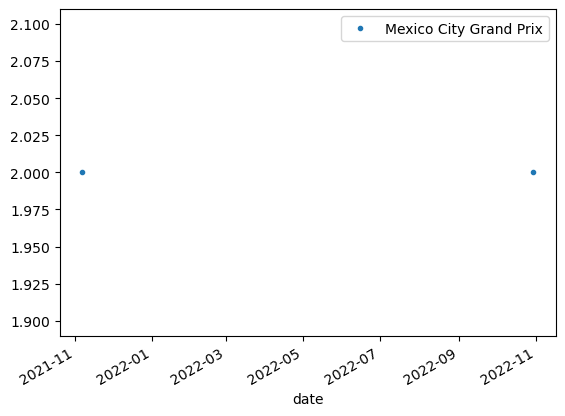

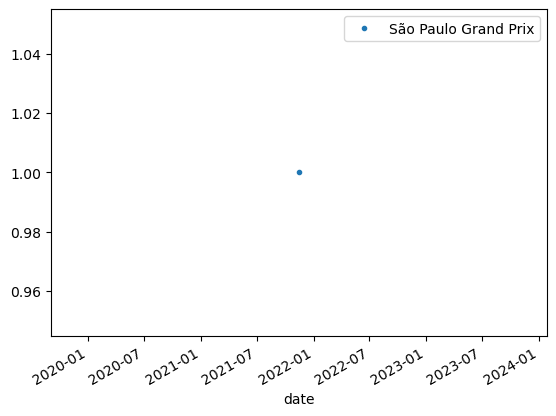

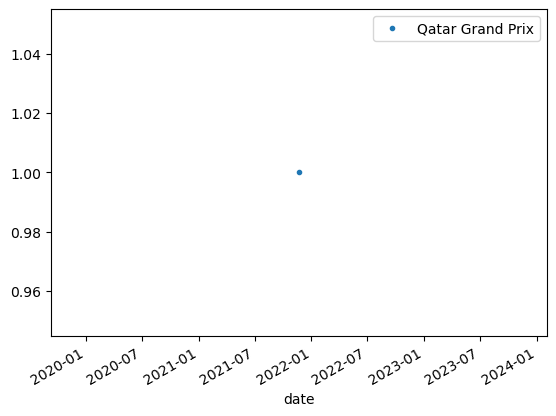

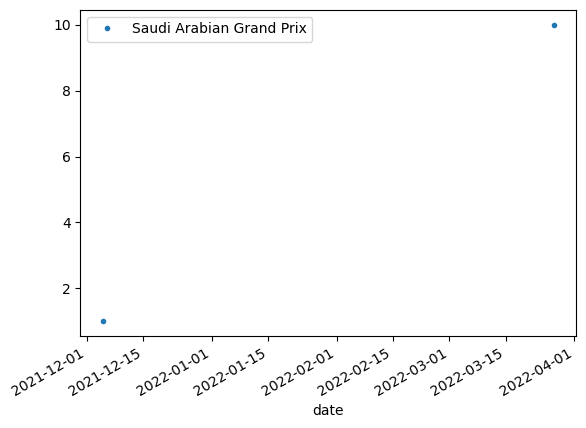

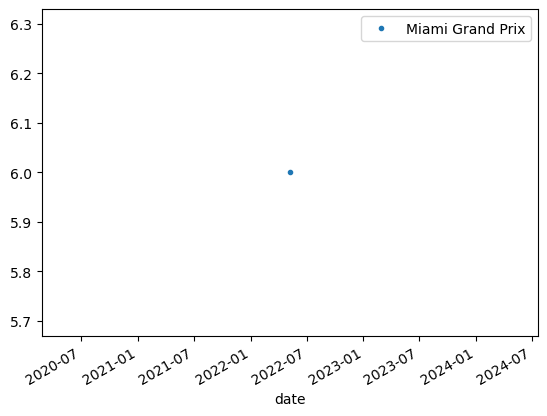

In [21]:
for i in dfHamilton['name_x'].unique():
    dfHamRace = dfHamilton[(dfHamilton["name_x"].str.contains(i))]
    dfHamRace.plot(x='date', y='position', style='.', label=i)
plt.show()

C:\Users\Adam\Documents\FormationGreta\anaconda\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


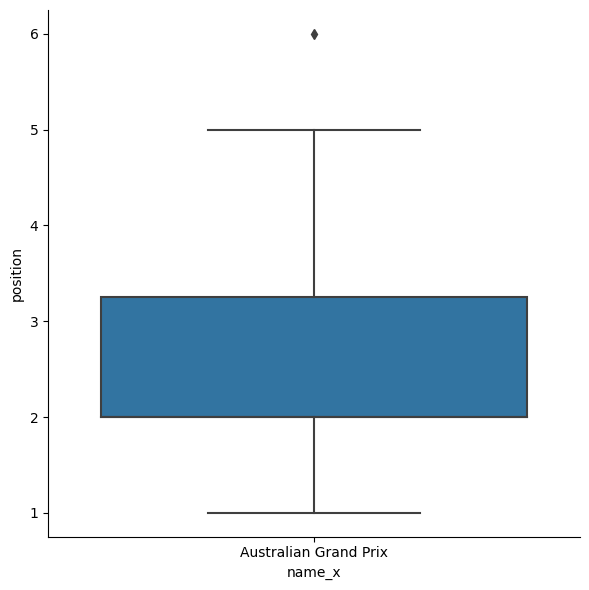

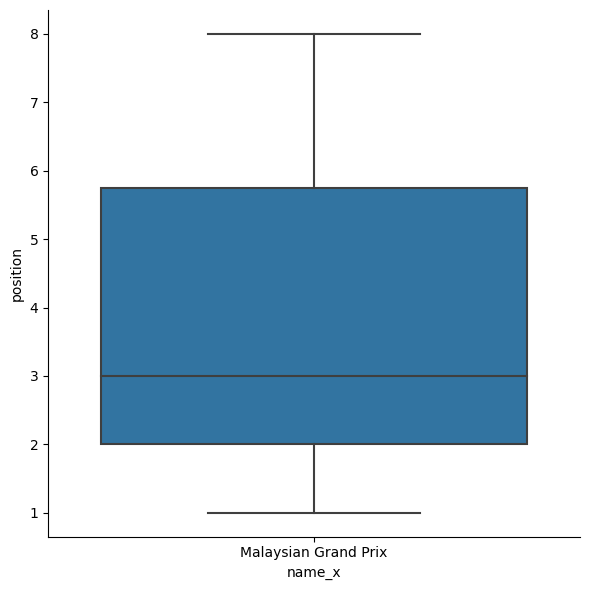

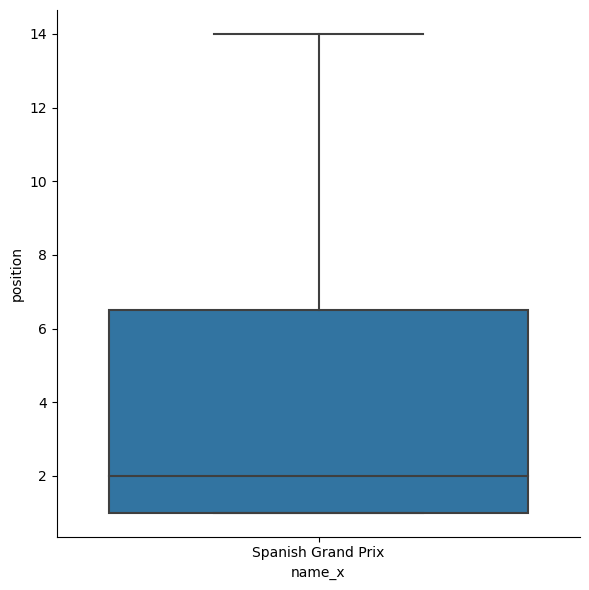

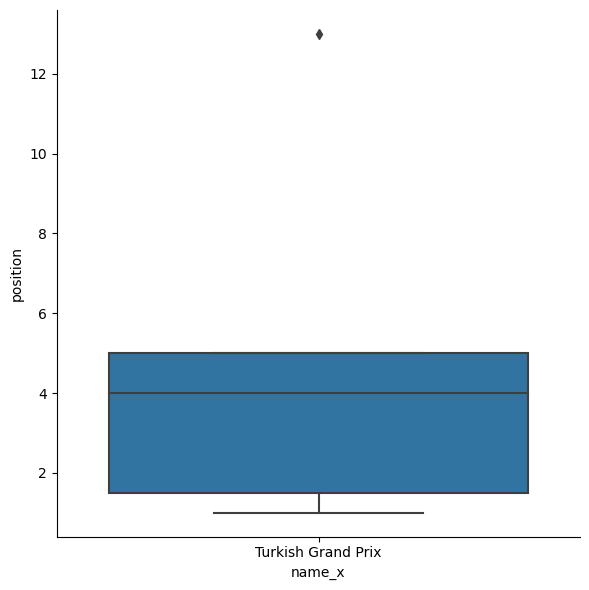

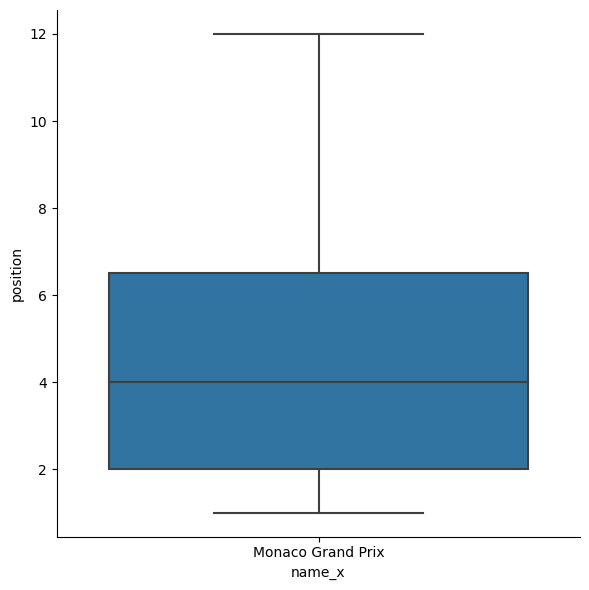

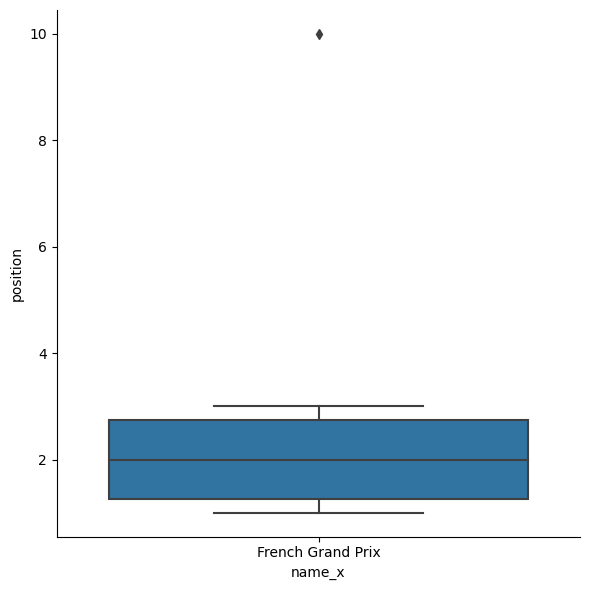

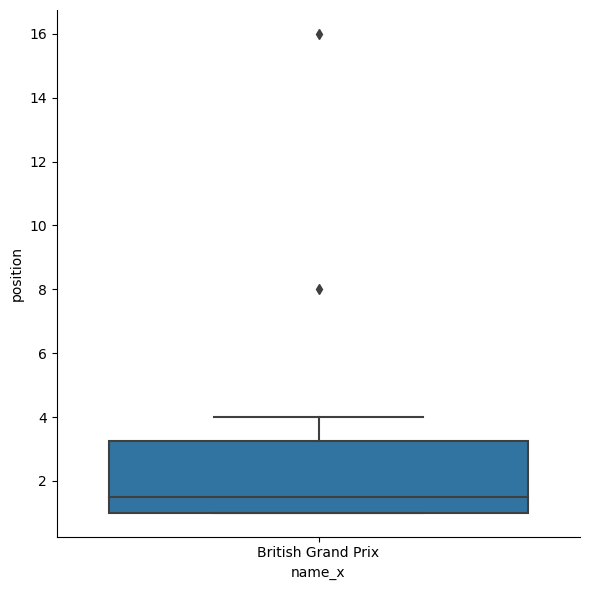

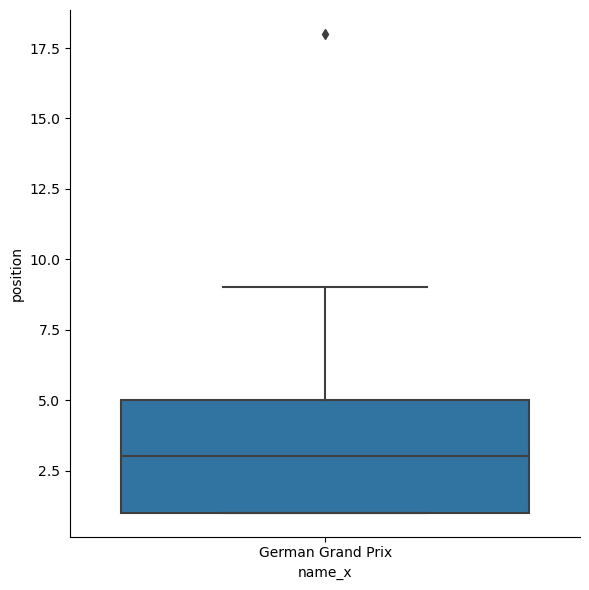

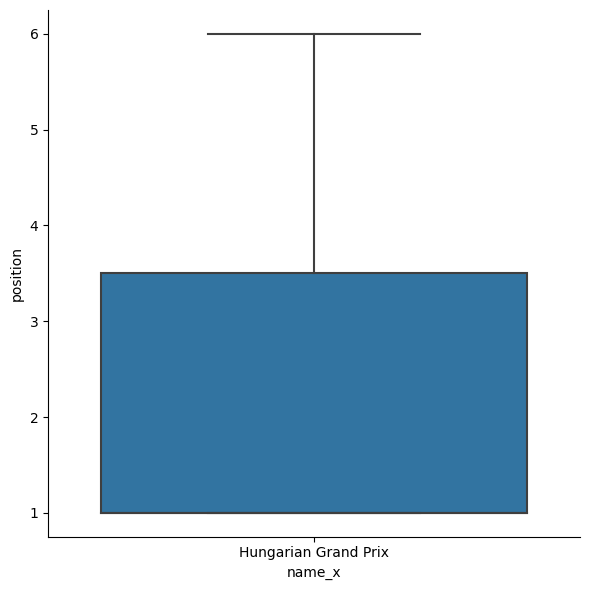

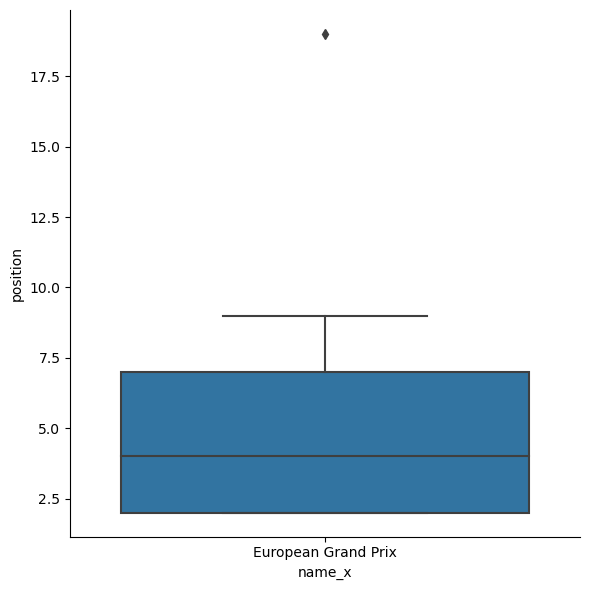

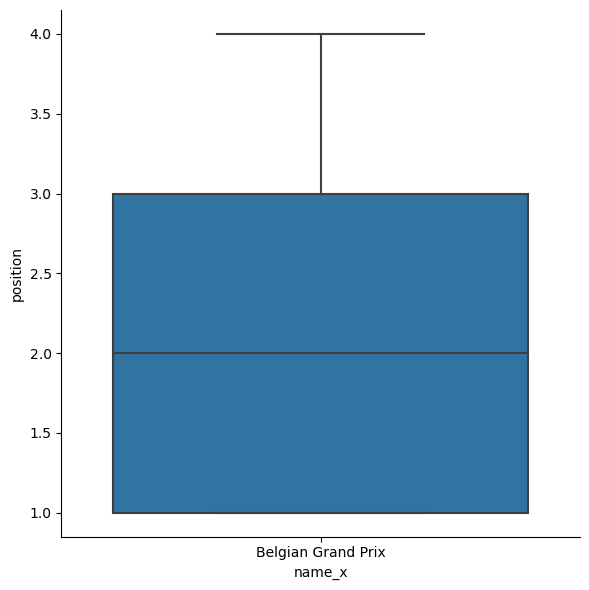

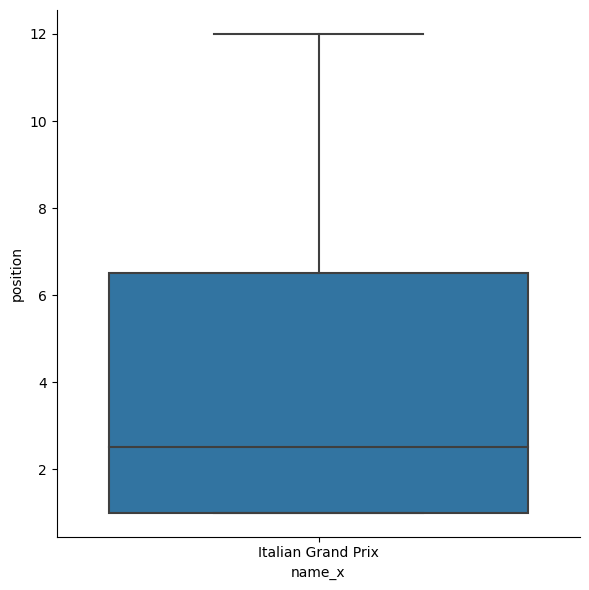

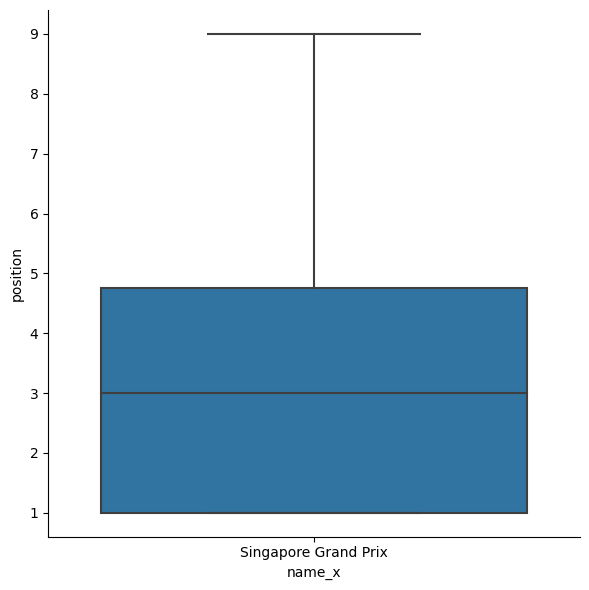

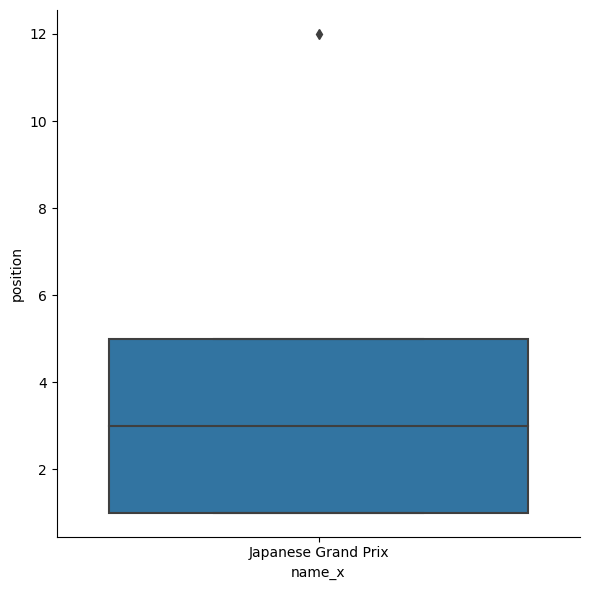

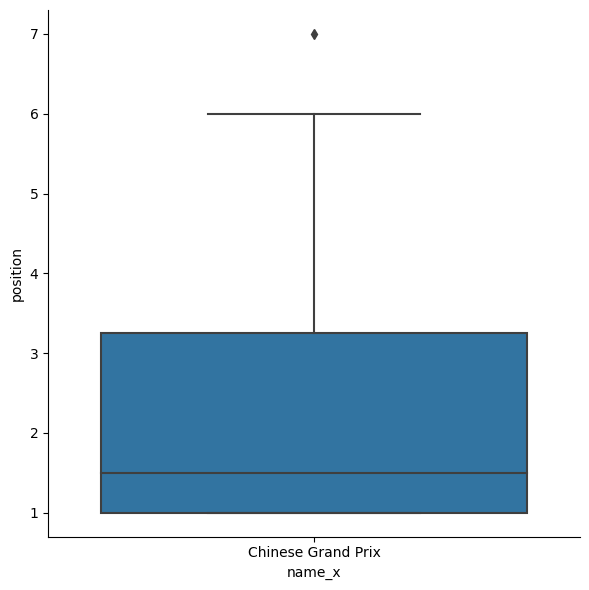

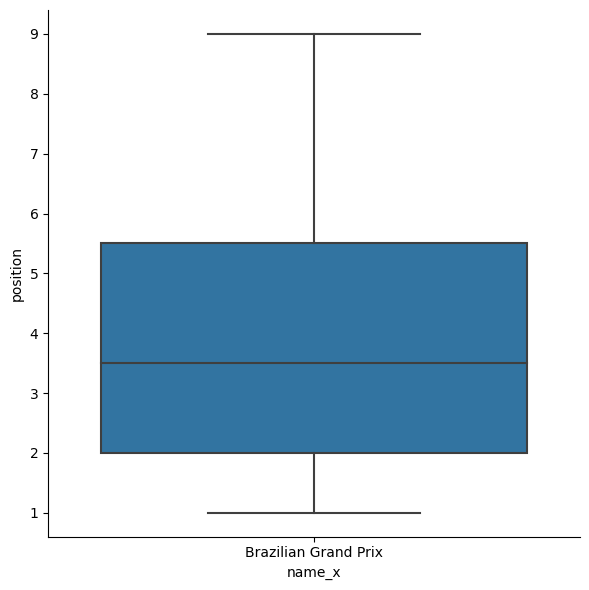

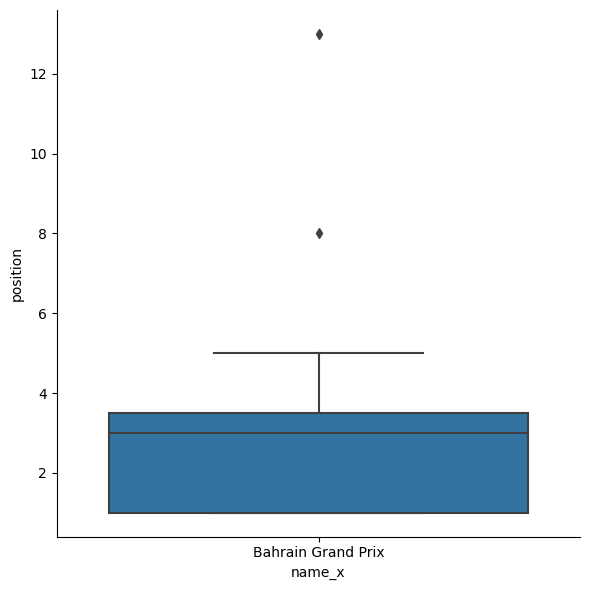

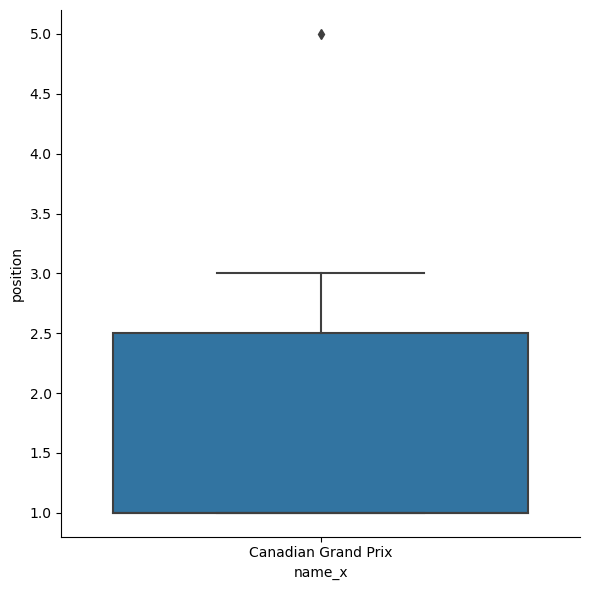

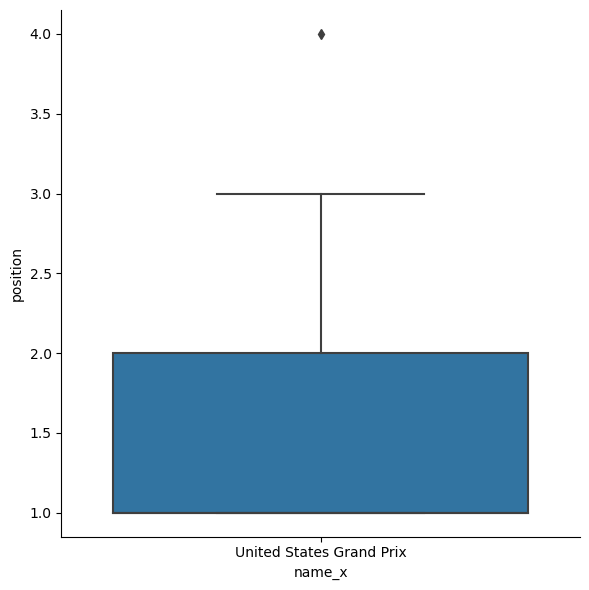

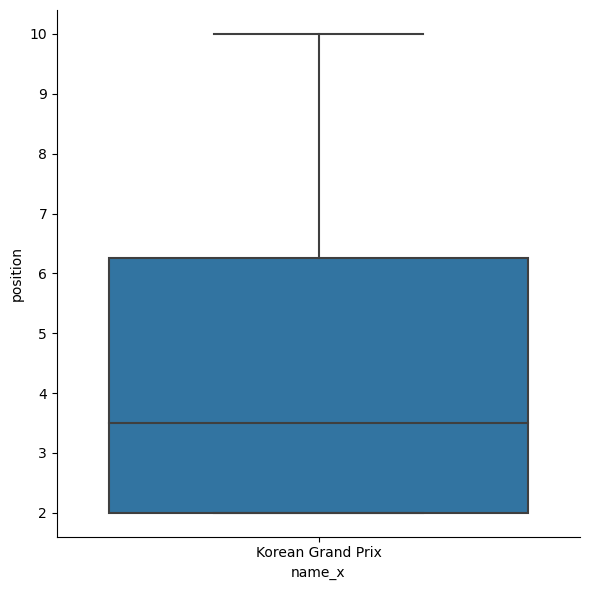

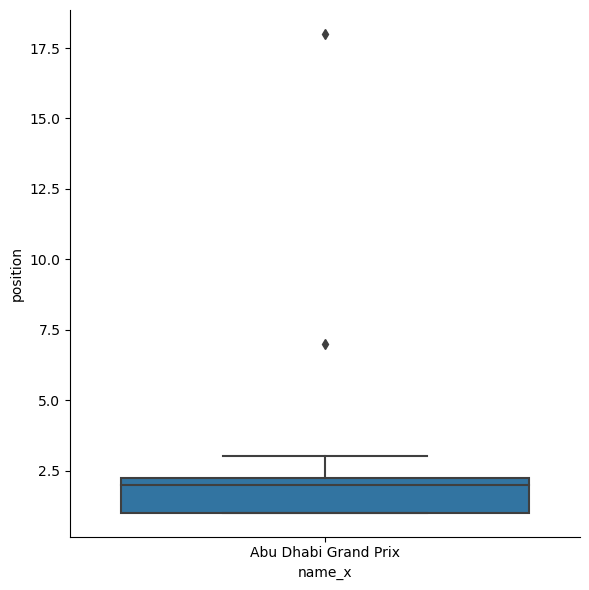

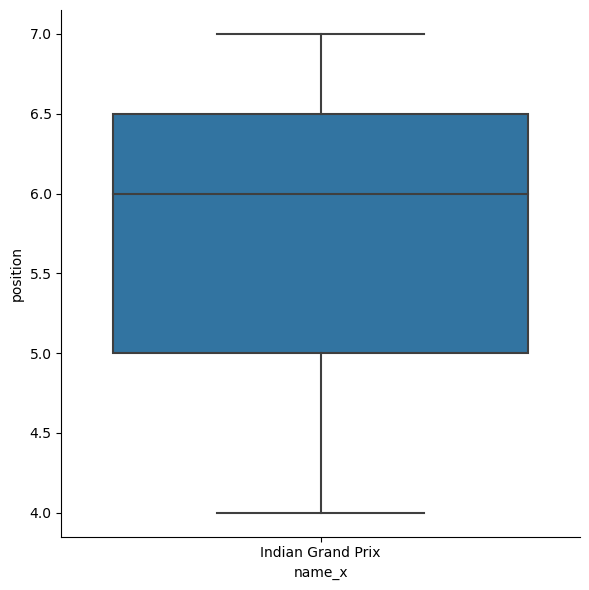

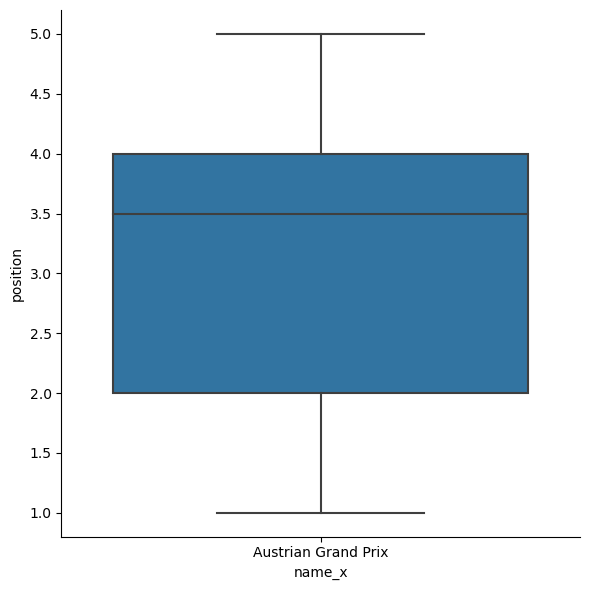

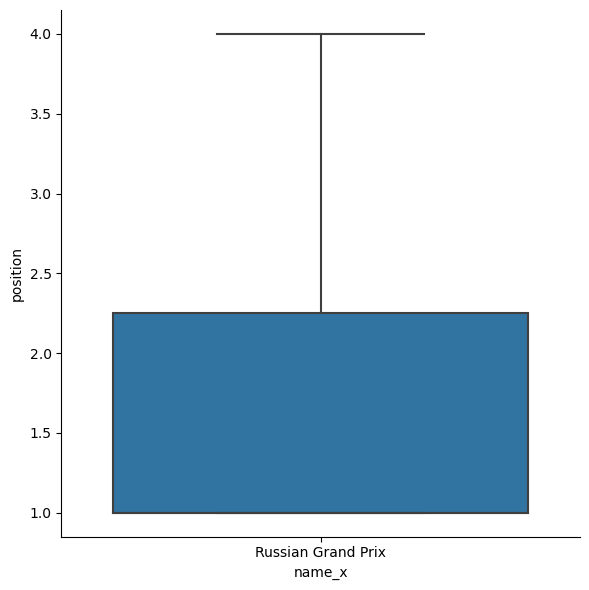

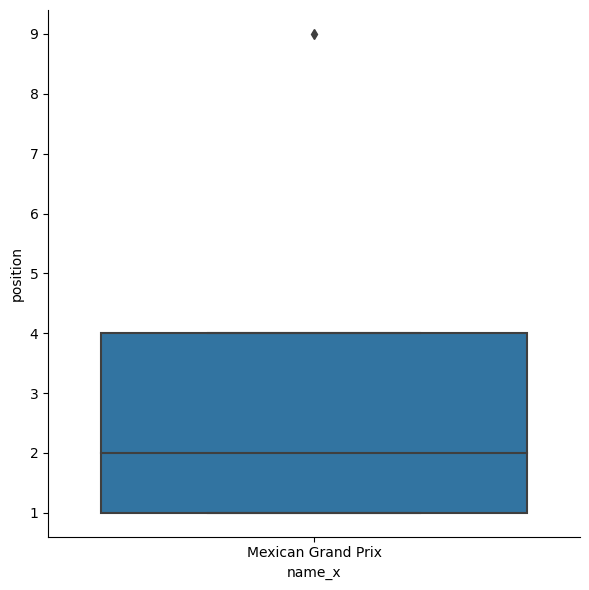

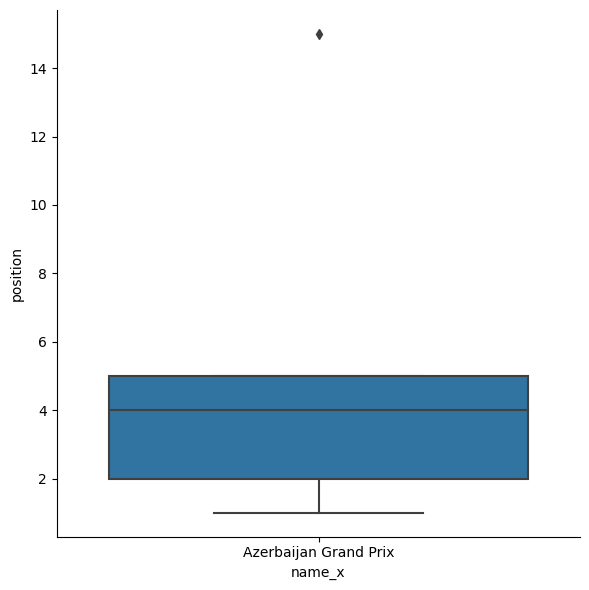

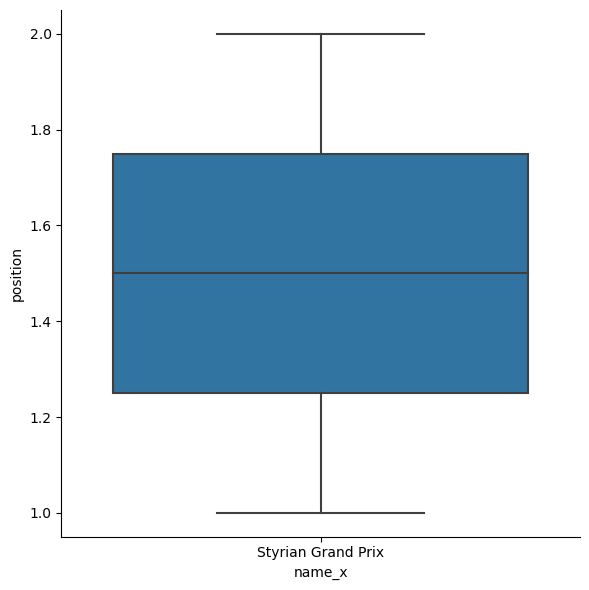

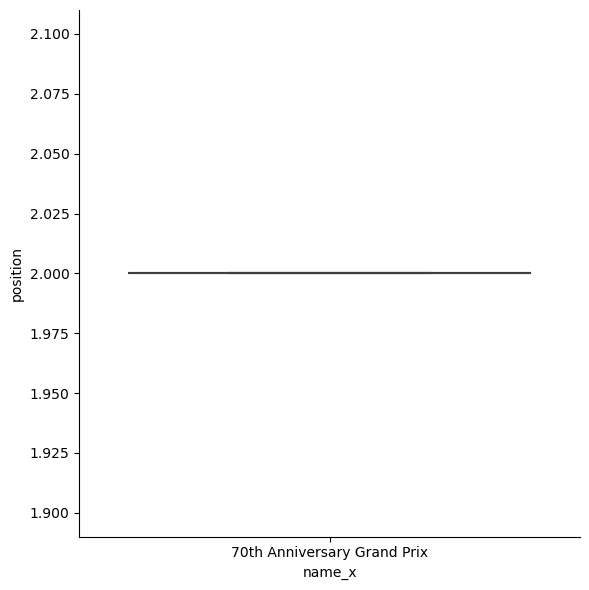

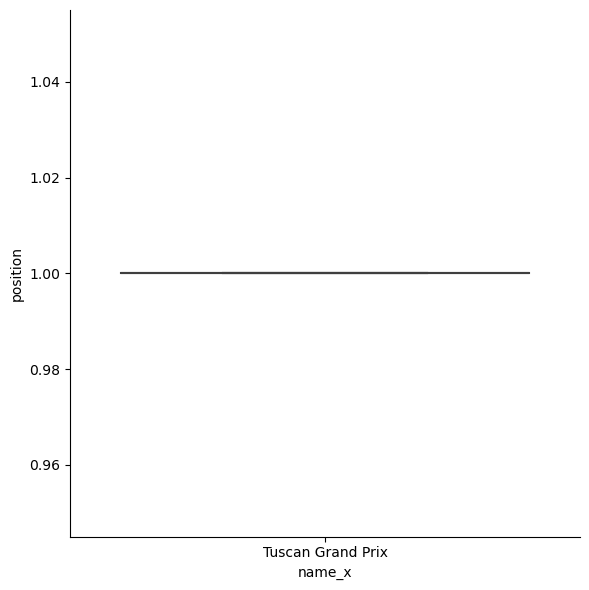

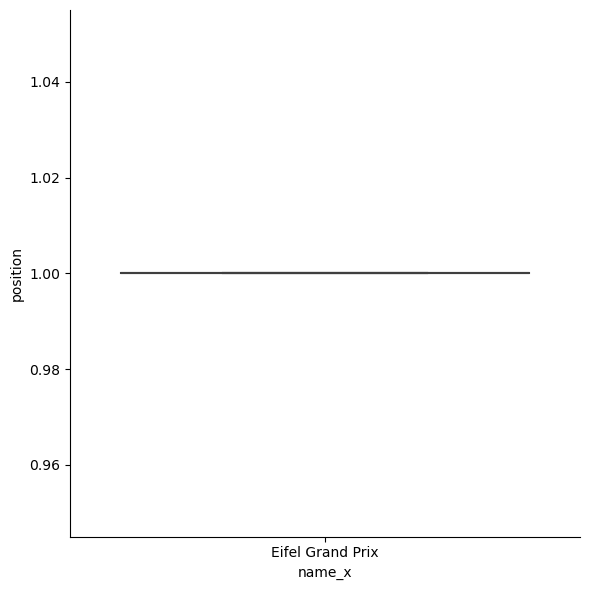

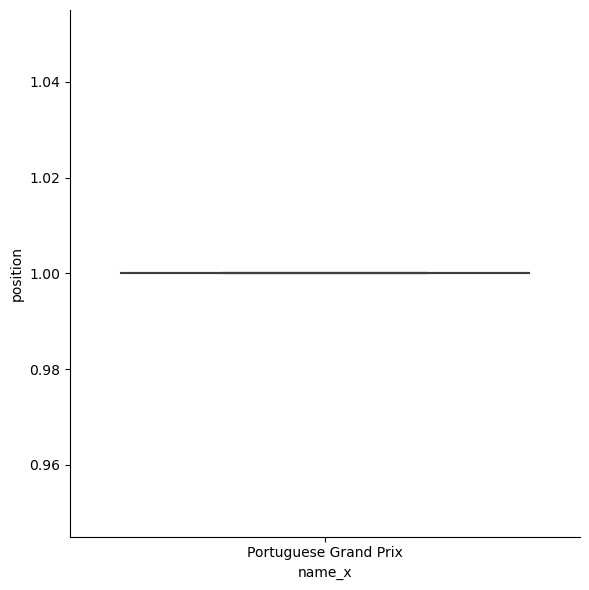

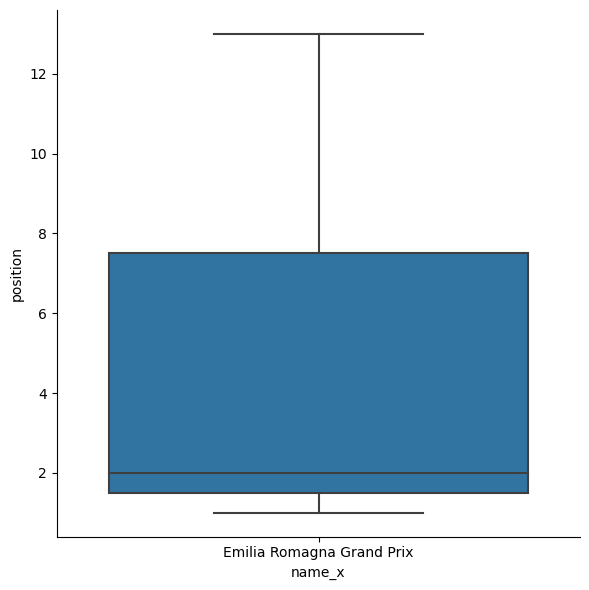

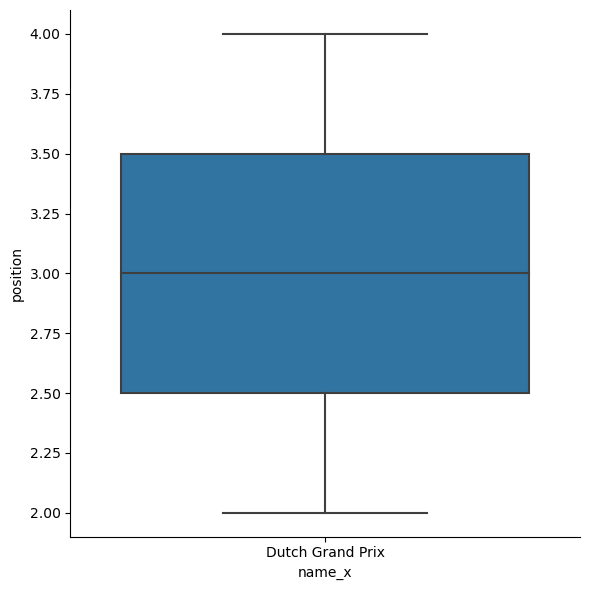

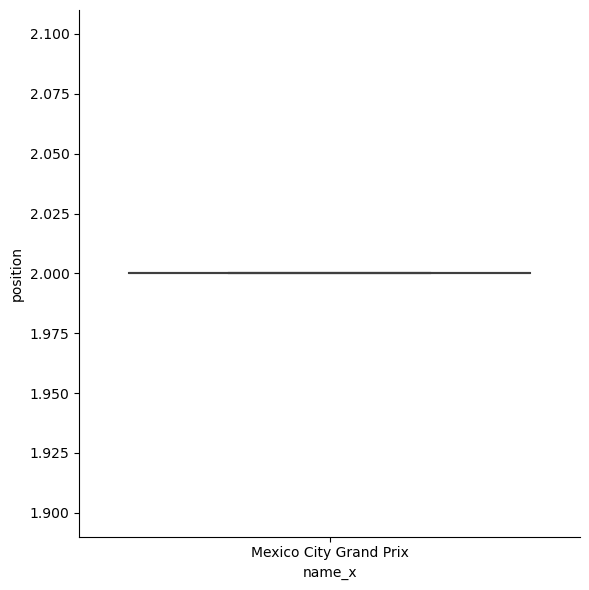

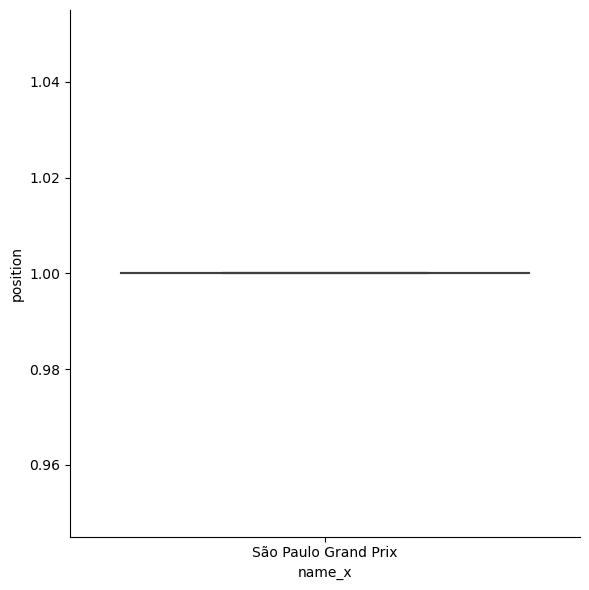

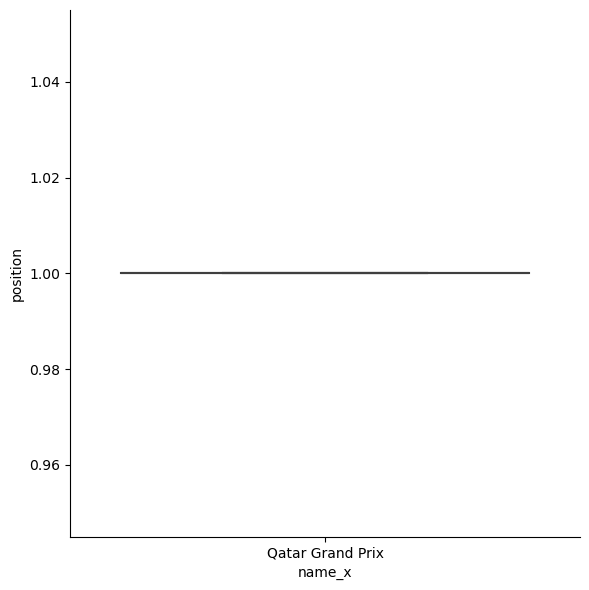

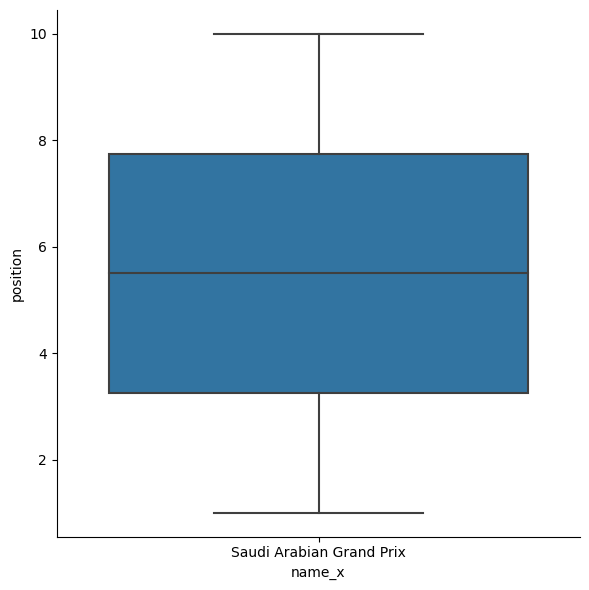

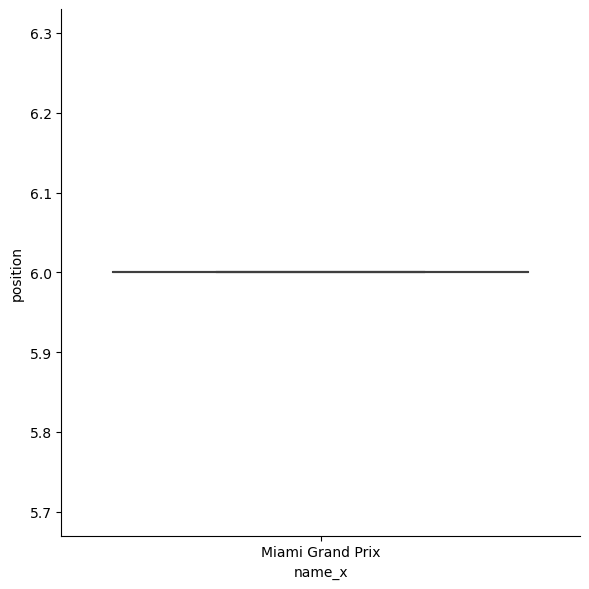

In [22]:
for i in dfHamilton['name_x'].unique():
    dfHamRace = dfHamilton[(dfHamilton["name_x"].str.contains(i))]
    sns.catplot(x="name_x", y="position", kind="box", data=dfHamRace, height=6)
plt.show() 

  ### Courses les plus pertinentes                    

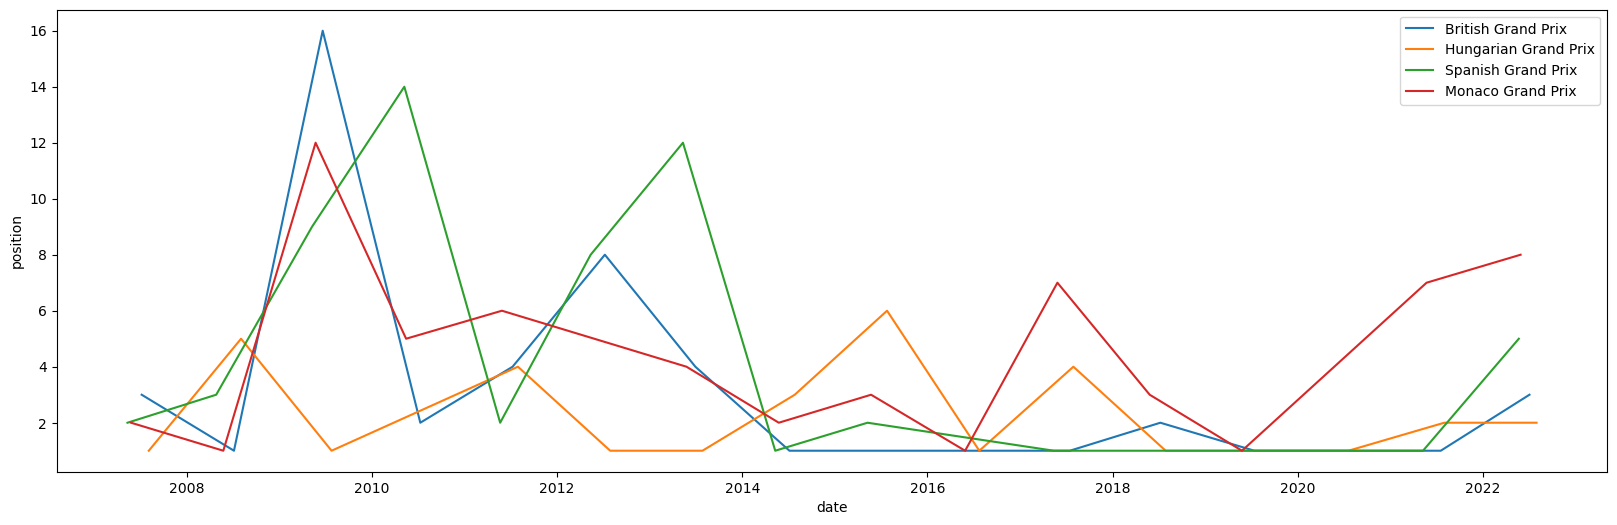

In [23]:
dfHamGPBritish=dfHamilton[dfHamilton['name_x'] == "British Grand Prix"]
dfHamGPHungarian=dfHamilton[dfHamilton['name_x'] == "Hungarian Grand Prix"]
dfHamGPSpanish=dfHamilton[dfHamilton['name_x'] == "Spanish Grand Prix"]
dfHamGPMonaco=dfHamilton[dfHamilton['name_x'] == "Monaco Grand Prix"]

plt.subplots(figsize=(20,6))
sns.lineplot(x="date", y="position", data=dfHamGPBritish, label="British Grand Prix")
sns.lineplot(x="date", y="position", data=dfHamGPHungarian, label="Hungarian Grand Prix")
sns.lineplot(x="date", y="position", data=dfHamGPSpanish, label="Spanish Grand Prix")
sns.lineplot(x="date", y="position", data=dfHamGPMonaco, label="Monaco Grand Prix")
plt.show()

### Constructeur / Ecurie

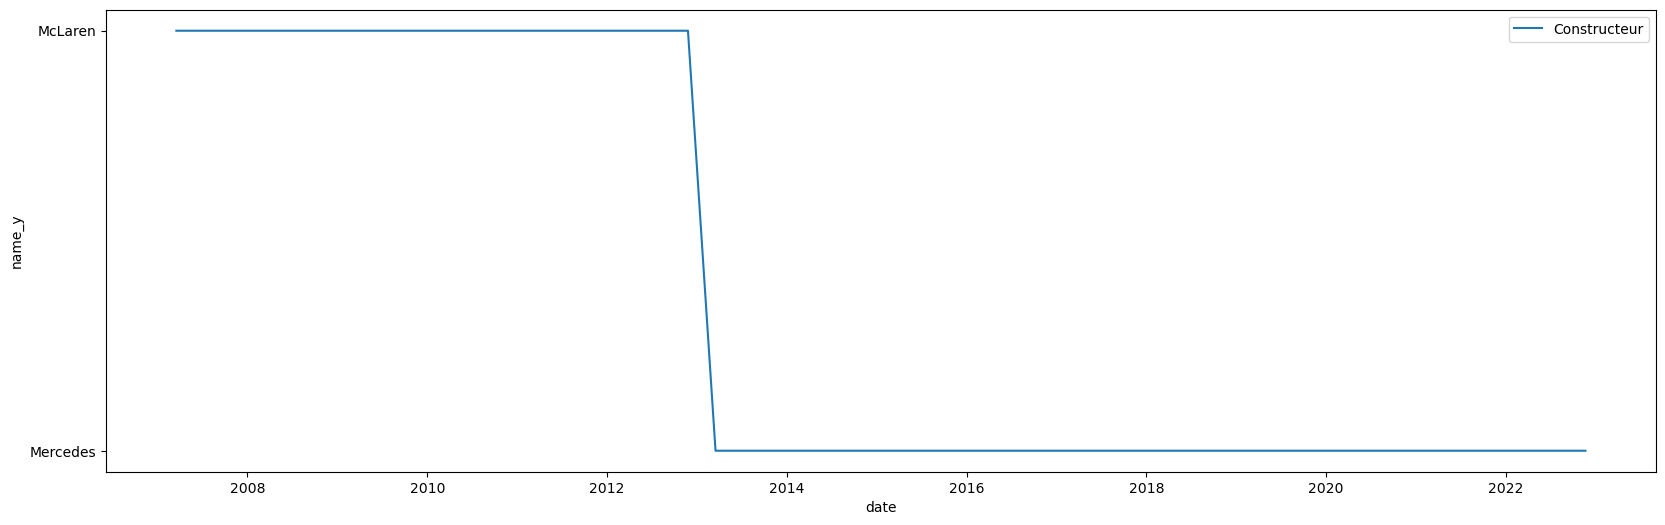

In [24]:
 plt.subplots(figsize=(20,6))
sns.lineplot(x="date", y="name_y", data=dfHamilton, label="Constructeur")
plt.show()

### Analyse de la position d'arrivé avec celle de départ

#### British Grand Prix 

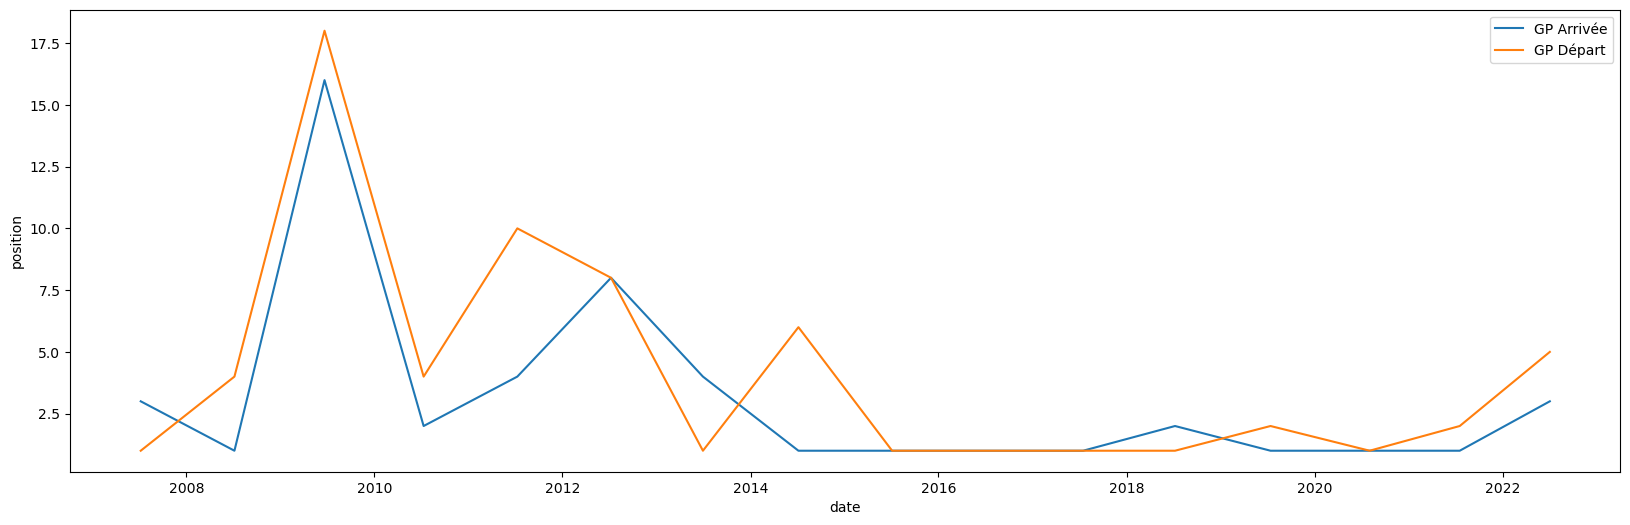

In [27]:
plt.subplots(figsize=(20,6))
sns.lineplot(x="date", y="position", data=dfHamGPBritish, label="GP Arrivée")
sns.lineplot(x="date", y="grid", data=dfHamGPBritish, label="GP Départ")
plt.show()

#### Hungarian Grand Prix 

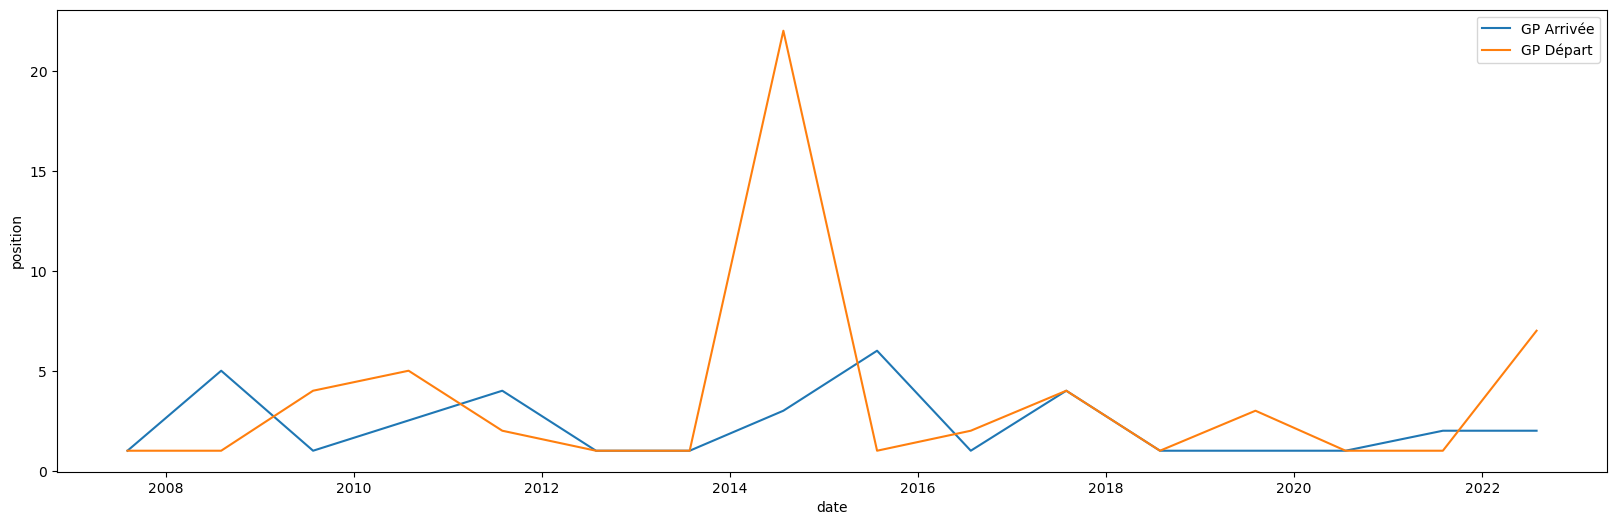

In [26]:
plt.subplots(figsize=(20,6))
sns.lineplot(x="date", y="position", data=dfHamGPHungarian, label="GP Arrivée")
sns.lineplot(x="date", y="grid", data=dfHamGPHungarian, label="GP Départ")
plt.show()

# Conclusion